**Project repository:** 

[Project Github Page](https://github.com/Mihcaelhuang/Mihcaelhuang.github.io)

**Project website (this page):**

[Access to FinalProject](https://mihcaelhuang.github.io/)


# Customer Presonality Analysis 

```
Author: Haoyuan Huang 
Class: cmps 3160
Date: 10/24/2021
```

+ Final Data Science Tutorial - CMPS 3660-02 - Introduction to Data Science - Professor Mattei

### Project Plan & Project goals:

This project is a comprehensive data analytical project on Customer Personality Analysis. The workflow of my project would be divided into following steps: 

**1. Introduction**

**2. Data: Extraction, Transform and Load**

**3. Exploratory Data Analysis**

**4. Model Construction and Evaluation**

**5. Conclusion & Suggestions**

Since I am a graduate student I will be work on this project alone.

The goal of the project is to explore the personalities for different customers, understand customer behavior and find a pattern to better target different customers.

**Project Datasets**

[Customer Personality Dataset](https://www.kaggle.com/imakash3011/customer-personality-analysis)

[Customer Churn Dataset](https://www.kaggle.com/blastchar/telco-customer-churn)

### Target Business Goal for this Project 
*A company has two methods to get more customers:*
1. Attract more customers 
2. Keep the existing customers. 

In my perspective, these two things will help a firm to understand a customer's personality.


### Project Motivation

Firstly, I would like to talk my motivation to complete this project using this dataset. I am a master student studying business analytics. I have rich experience in business world and I am passionated to understand how could a business firm or entity is able to maximize their profits and why are some business firms are making more money than others. 

Secondly, as a business people, the most important thing is take care of our customers. A super successful business will not only take care about its short-term profit but they are able to keep a good relationship with its customers so they will become a long-term customers. I would love to analyze on customer's behavior and understand how could we target a customer depend on his or her personal needs. 

For this project, I will be providing a data science analysis of customer personality and customer churn data. This project aims to use exploratory data analysis to find the historical patterns and evaluating customers in causes of different purchasing behaviors and help business to identify different customer groups so they will able to better target their customer and identify what are some factors will cause a higher churn rate.

### Project Questions 
1. Firstly, Since we have limited resources and money so How could we better target our customers?
2. How could we segement our customers into different groups so we are able to identify some important features on certain customers? 
3. How could we predict behavior to retain customers and reduce their churn rate? 


### Data Usage
I have two datasets. The customer personality data will be able to help me to segment customers. For example, I plan to use customer average product spent, total number thier spent and the time a customer has been a active user as my features to build a k-mean clustering analysis. Since this is a unlabeled dataset so I will create a label based on its purchase frequency so I am planning to use features like age, income, total purchase number, purchase channel and more to build a decision tree model to determine a high-frequency customer vs a low-frequency customer. 

I will use second dataset to predict customer churn rate. For example, the data contains variables like whether a customer is a senior citizan or age of a customer, tenure(how long a customer have stayed with their company) and more, so I will able to build a model to help me to evaluate the positive or negative impact this variable will bring to the customer churn rate. 

**I will use two datasets for this project. I am planning to not merge two datasets together, and I will use each dataset to solve different business problems. In order to attract more new customers, my business question is how could we better target our customer and I will use the customer personality data to answer this problem. In order to keep the existing customers, my business question is how could we reduce the churn rate of customers and I will use customer churn data to answer the business problem.**

### Data Source
After my consideration for potential datasets, I choosed and got the dataset from Kaggle. Kaggle is an online community of data scientists and machine learning practitioners. Kaggle allows users to find and publish data sets, explore and build models in a web-based data-science environment, work with other data scientists and machine learning engineers, and enter competitions to solve data science challenges.  

**Customer Personality Dataset Information**:
The data offers the customer demographic information, products they bought in the past, and the place they bought their product, discount and promotion information on company's product. 

**Customer Personality Dataset Limitation**:
Limitions of the data includes data set doesn't have different companies and brand names. This could be another interesting and important business problem to analyze. For example, we can analyze the data to study the factors that contribute to brand retention or improve brand reputation. However, for this particular dataset I will focus on grouping customers and differeciate their behaviors. Another limitation is the dataset is not up to date.

[The final dataset can be download here](https://www.kaggle.com/imakash3011/customer-personality-analysis)


**Customer Churn Dataset Information**:
The data is a labeled data and we have the information on whether this customer is churned or not. The data contains the customer demographic information, their daily behaviors and their company information, their phone service and internet service and lot more.

**Customer Personality Dataset Limitation**:
The data is not linked to the customer personality data and I think that's a limitation for my analysis so I can not merge two datasets together.

[The final dataset can be download here](https://www.kaggle.com/blastchar/telco-customer-churn)


**General Information**:

[More information about Kaggle](https://en.wikipedia.org/wiki/Kaggle)

In [1]:
# Required packages 
# Load Numpy
import numpy as np
# Load MatPlotLib
import matplotlib
import matplotlib.pyplot as plt
# Load Seaborn 
import seaborn as sns 
# Load Plotly 
import plotly.express as px 
import plotly.io as pio
# Load Pandas
import pandas as pd
# Plot Missing Values 
import missingno as msno
# Stats 
from scipy.stats import skew
import statsmodels.api as sm
import pylab as py
from scipy.stats import norm
# RE
import re

# This lets us show plots inline and also save PDF plots if we want them
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
matplotlib.style.use('seaborn')

# These two things are for Pandas, it widens the notebook and lets us display data easily.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Show a ludicrus number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Import machine learning packages
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 

# Import warnings package to ignore warnings
import warnings 
warnings.filterwarnings('ignore')

+ This magic box was motivated by Prof Mattei and contributed to class documents and SkLearn documentation. [Sklearn documentation](https://scikit-learn.org/stable/index.html)

# Data: Extraction, Transform, and Load

### Customer Personality Analysis Data 

#### Extraction 
This dataset was extracted from [Here](https://www.kaggle.com/imakash3011/customer-personality-analysis). The site gives clearly stated data documentation which includes variable dictionary to explain each varaible. In addtional, the site allows provides the first look of the dataset so I have the options to see the dimension of the data. The data is in csv(comma separated file) so I can directly loaded into my notebook.

#### Load
I will use pandas to load the data and other necessary packages needed for my analysis. Load the data, I will use pandas read_csv() to read the data using the seperator value as a tab and display the data without any data cleaning. 

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep = '\t')
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response
0  5524        1957  Graduation         Single  58138.0        0         0  04-09-2012       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0              3         11         1
1  2174        1954  Graduation         Single  46344.0        1         1  08-03-2014       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0              3         11         0
2  4141        1965  Graduation       Together  71613.0        0         0  21-08-2013       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0              3         11         0
3  6182        1984  Graduation       Together  26646.0        1         0  10-02-2014       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0              3         11         0
4  5324        1981         PhD        Married  58293.0        1         0  19-01-2014       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0              3         11         0

#### Transformation 

Look throught the dataset, there are couple things I would like to examine on the dataset:
1. Missing Values 
2. Examine categorical variables 
3. We can see the data is in long format and I will be combing some columns to calculate its total values.
4. Delete some unnecessary columns 
5. Add date related column 
6. Check datatypes 

In [3]:
# Check missing value 
display(df.isna().sum())
display(df[df['Income'].isnull()])

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response
10     1994        1983  Graduation        Married     NaN        1         0  15-11-2013       11         5          5                6                0                 2             1                  1                1                    0                  2                  7             0             0             0             0             0         0              3         11         0
27     5255        1986  Graduation         Single     NaN        1         0  20-02-2013       19         5          1                3                3               263           362                  0               27                    0                  0                  1             0             0             0             0             0         0              3         11         0
43     7281        1959         PhD         Single     NaN        0         0  05-11-2013       80        81         11               50                3                 2            39                  1                1                    3                  4                  2             0             0             0             0             0         0              3         11         0
48     7244        1951  Graduation         Single     NaN        2         1  01-01-2014       96        48          5               48                6                10             7                  3                2                    1                  4                  6             0             0             0             0             0         0              3         11         0
58     8557        1982  Graduation         Single     NaN        1         0  17-06-2013       57        11          3               22                2                 2             6                  2                2                    0                  3                  6             0             0             0             0             0         0              3         11         0
71    10629        1973    2n Cycle        Married     NaN        1         0  14-09-2012       25        25          3               43               17                 4            17                  3                3                    0                  3                  8             0             0             0             0             0         0              3         11         0
90     8996        1957         PhD        Married     NaN        2         1  19-11-2012        4       230         42              192               49                37            53                 12                7                    2                  8                  9             0             0             0             0             0         0              3         11         0
91     9235        1957  Graduation         Single     NaN        1         1  27-05-2014       45         7          0                8                2                 0             1                  1                1                    0                  2                  7             0             0             0             0             0         0              3         11         0
92     5798        1973      Master       Together     NaN        0         0  23-11-2013       87       445         37              359               98                28            18                  1                2                    4                  8                  1             0             0             0             0             0         0              3         11         0
128    8268        1961         PhD    

There are 24 missing values in the income column, then I will try to fill the missing values. I will use describe() to see its statistics to determine which method I should use to fill up the missing values.

In [4]:
display(df['Income'].describe())

# Fill NAs with mean 
mean = df['Income'].mean()
for i in range(df.shape[0]):
    if pd.isnull(df.Income[i]) == True:
        df.Income[i] = mean
    else:
        pass 
display(df[df['Income'].isnull()])

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

##### I'm curious to see these categorical columns and for sake the model building 
I will try to combine features into a binary variable and create a new column. I will use value_counts() to see each varaibles and use replace function to make it a binary variable and assign it to a new variable.

In [5]:
display(df['Education'].unique())
display(df['Education'].value_counts())

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [6]:
df['Education_level'] = df['Education'].apply(lambda x: 'Undergraduate' if x == 'Basic' else 'Graduate')
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response Education_level
0  5524        1957  Graduation         Single  58138.0        0         0  04-09-2012       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0              3         11         1        Graduate
1  2174        1954  Graduation         Single  46344.0        1         1  08-03-2014       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0              3         11         0        Graduate
2  4141        1965  Graduation       Together  71613.0        0         0  21-08-2013       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0              3         11         0        Graduate
3  6182        1984  Graduation       Together  26646.0        1         0  10-02-2014       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0              3         11         0        Graduate
4  5324        1981         PhD        Married  58293.0        1         0  19-01-2014       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0              3         11         0        Graduate

Similarly, the "Marital_Status" column hold the same categorical information so I will keep the column to be a binary variable. I will create a new column to repalce the variables to simplify.

In [7]:
display(df['Marital_Status'].unique())
display(df['Marital_Status'].value_counts())

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [8]:
df['Marital_Status_all'] = df['Marital_Status'].apply(lambda x: 'Relationship' if (x == 'Married' or x == 'Together') else "Single")
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response Education_level Marital_Status_all
0  5524        1957  Graduation         Single  58138.0        0         0  04-09-2012       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0              3         11         1        Graduate             Single
1  2174        1954  Graduation         Single  46344.0        1         1  08-03-2014       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0              3         11         0        Graduate             Single
2  4141        1965  Graduation       Together  71613.0        0         0  21-08-2013       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0              3         11         0        Graduate       Relationship
3  6182        1984  Graduation       Together  26646.0        1         0  10-02-2014       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0              3         11         0        Graduate       Relationship
4  5324        1981         PhD        Married  58293.0        1         0  19-01-2014       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0              3         11         0        Graduate       Relationship

##### Next, I will try to combine some columns together. 
For example, Kidhome is the number of children in customer's household and Teenhome is the number of teenagers in customer's household. The start of the "Mnt" is the amount spent on "Product" in last 2 years, so I will combine them in into total values. The start of the "NumXXPurchases" is the number of purchases made through "xx" place, so I will combine them in into total purchases.The start of the "Accepted" is if customer accepted the offer in the "xx" campaign and "Response" is 1 if customer accepted the offer in the last campaign.

In [9]:
for index, row in df.iterrows():
    df.loc[index,'Number_of_Kids'] = row['Kidhome'] + row['Teenhome']
    df.loc[index, 'Total_Product_Spent_per_month'] = row['MntWines']+ row['MntFruits']+ row['MntMeatProducts']+ row['MntFishProducts']+ row['MntSweetProducts']+  row['MntGoldProds']
    df.loc[index, 'Total_Purchase_per_month'] = row['NumDealsPurchases']+ row['NumWebPurchases']+ row['NumCatalogPurchases']+ row['NumStorePurchases']
    df.loc[index, 'Total_Accept_Offer'] = row['AcceptedCmp1']+ row['AcceptedCmp2']+row['AcceptedCmp3']+row['AcceptedCmp4']+row['AcceptedCmp5']+row['Response']
    
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response Education_level Marital_Status_all  Number_of_Kids  Total_Product_Spent_per_month  Total_Purchase_per_month  Total_Accept_Offer
0  5524        1957  Graduation         Single  58138.0        0         0  04-09-2012       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0              3         11         1        Graduate             Single             0.0                         1617.0                      25.0                 1.0
1  2174        1954  Graduation         Single  46344.0        1         1  08-03-2014       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0              3         11         0        Graduate             Single             2.0                           27.0                       6.0                 0.0
2  4141        1965  Graduation       Together  71613.0        0         0  21-08-2013       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0              3         11         0        Graduate       Relationship             0.0                          776.0                      21.0                 0.0
3  6182        1984  Graduation       Together  26646.0        1         0  10-02-2014       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0              3         11         0        Graduate       Relationship             1.0                           53.0                       8.0                 0.0
4  5324        1981         PhD        Married  58293.0        1         0  19-01-2014       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0              3         11         0        Graduate       Relationship             1.0                          422.0                      19.0                 0.0

It is also important to compute its average spend as well and the percentage on number of purchases made with a discount

In [10]:
df['Average_Spend_per_product'] = round((df['Total_Product_Spent_per_month'] / df['Total_Purchase_per_month']), 1)
df['Deals_Purchases'] = round((df['NumDealsPurchases'] / df['Total_Purchase_per_month']) * 100, 1)
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response Education_level Marital_Status_all  Number_of_Kids  Total_Product_Spent_per_month  Total_Purchase_per_month  Total_Accept_Offer  Average_Spend_per_product  Deals_Purchases
0  5524        1957  Graduation         Single  58138.0        0         0  04-09-2012       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0              3         11         1        Graduate             Single             0.0                         1617.0                      25.0                 1.0                       64.7             12.0
1  2174        1954  Graduation         Single  46344.0        1         1  08-03-2014       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0              3         11         0        Graduate             Single             2.0                           27.0                       6.0                 0.0                        4.5             33.3
2  4141        1965  Graduation       Together  71613.0        0         0  21-08-2013       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0              3         11         0        Graduate       Relationship             0.0                          776.0                      21.0                 0.0                       37.0              4.8
3  6182        1984  Graduation       Together  26646.0        1         0  10-02-2014       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0              3         11         0        Graduate       Relationship             1.0                           53.0                       8.0                 0.0                        6.6             25.0
4  5324        1981         PhD        Married  58293.0        1         0  19-01-2014       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0              3         11         0        Graduate       Relationship             1.0                          422.0                      19.0                 0.0                       22.2             26.3

+ I will remian the orginal columns for now because I think it is important for me to keep them for data explorative analysis, but I will drop them later before the modeling.

##### Next, I am going to drop some columns, I will use nunique( ) to check its unique values for every columns. 
Z_CostContact and Z_Revenue only contains one variable and it is not necessary for the project so I will drop them. I have already known customer's age so it's necessary for me to know keep its birth year. I have combined Kid and Teen so I will also drop them.

In [11]:
df.nunique()

ID                               2240
Year_Birth                         59
Education                           5
Marital_Status                      8
Income                           1975
Kidhome                             3
Teenhome                            3
Dt_Customer                       663
Recency                           100
MntWines                          776
MntFruits                         158
MntMeatProducts                   558
MntFishProducts                   182
MntSweetProducts                  177
MntGoldProds                      213
NumDealsPurchases                  15
NumWebPurchases                    15
NumCatalogPurchases                14
NumStorePurchases                  14
NumWebVisitsMonth                  16
AcceptedCmp3                        2
AcceptedCmp4                        2
AcceptedCmp5                        2
AcceptedCmp1                        2
AcceptedCmp2                        2
Complain                            2
Z_CostContac

In [12]:
df.drop(columns = ['ID', 'Kidhome', 'Teenhome', 'Z_CostContact', 'Z_Revenue'], axis =1, inplace = True)

In [13]:
df.head()

Year_Birth   Education Marital_Status   Income Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response Education_level Marital_Status_all  Number_of_Kids  Total_Product_Spent_per_month  Total_Purchase_per_month  Total_Accept_Offer  Average_Spend_per_product  Deals_Purchases
0        1957  Graduation         Single  58138.0  04-09-2012       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0         1        Graduate             Single             0.0                         1617.0                      25.0                 1.0                       64.7             12.0
1        1954  Graduation         Single  46344.0  08-03-2014       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0         0        Graduate             Single             2.0                           27.0                       6.0                 0.0                        4.5             33.3
2        1965  Graduation       Together  71613.0  21-08-2013       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0         0        Graduate       Relationship             0.0                          776.0                      21.0                 0.0                       37.0              4.8
3        1984  Graduation       Together  26646.0  10-02-2014       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0         0        Graduate       Relationship             1.0                           53.0                       8.0                 0.0                        6.6             25.0
4        1981         PhD        Married  58293.0  19-01-2014       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0         0        Graduate       Relationship             1.0                          422.0                      19.0                 0.0                       22.2             26.3

##### Next, the column "Dt_Customer" is the date of customer's enrollment with the company
I will be able to know the duration of a customer have been staying with the company. The dataset contains customer's information from 2012 to 2015 so I will assume the lastest date is 01-01-2016.

In [14]:
# create a new columns named duration 
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# I assume today's date is 01-01-2016
df['today'] = '01-01-2016'
df['today'] = pd.to_datetime(df['today'])
for index, row in df.iterrows():
    df.loc[index, 'Days_since_client'] = row['today'] - row['Dt_Customer']
df.head()

Year_Birth   Education Marital_Status   Income Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response Education_level Marital_Status_all  Number_of_Kids  Total_Product_Spent_per_month  Total_Purchase_per_month  Total_Accept_Offer  Average_Spend_per_product  Deals_Purchases      today Days_since_client
0        1957  Graduation         Single  58138.0  2012-04-09       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0         1        Graduate             Single             0.0                         1617.0                      25.0                 1.0                       64.7             12.0 2016-01-01         1362 days
1        1954  Graduation         Single  46344.0  2014-08-03       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0         0        Graduate             Single             2.0                           27.0                       6.0                 0.0                        4.5             33.3 2016-01-01          516 days
2        1965  Graduation       Together  71613.0  2013-08-21       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0         0        Graduate       Relationship             0.0                          776.0                      21.0                 0.0                       37.0              4.8 2016-01-01          863 days
3        1984  Graduation       Together  26646.0  2014-10-02       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0         0        Graduate       Relationship             1.0                           53.0                       8.0                 0.0                        6.6             25.0 2016-01-01          456 days
4        1981         PhD        Married  58293.0  2014-01-19       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0         0        Graduate       Relationship             1.0                          422.0                      19.0                 0.0                       22.2             26.3 2016-01-01          712 days

In [15]:
df['Days_since_client'] = df['Days_since_client'].astype('str')

for index, row in df.iterrows():
    df.loc[index, 'Days_since_client'] = row['Days_since_client'].split(' ')[0]


In [16]:
# Remove str in the variable 
df['Days_since_client'] = df['Days_since_client'].astype('str')
for index, row in df.iterrows():
    df.loc[index, "Days_since_client"] = row["Days_since_client"].split(' ')[0]

df.head()

Year_Birth   Education Marital_Status   Income Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response Education_level Marital_Status_all  Number_of_Kids  Total_Product_Spent_per_month  Total_Purchase_per_month  Total_Accept_Offer  Average_Spend_per_product  Deals_Purchases      today Days_since_client
0        1957  Graduation         Single  58138.0  2012-04-09       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0         1        Graduate             Single             0.0                         1617.0                      25.0                 1.0                       64.7             12.0 2016-01-01              1362
1        1954  Graduation         Single  46344.0  2014-08-03       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0         0        Graduate             Single             2.0                           27.0                       6.0                 0.0                        4.5             33.3 2016-01-01               516
2        1965  Graduation       Together  71613.0  2013-08-21       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0         0        Graduate       Relationship             0.0                          776.0                      21.0                 0.0                       37.0              4.8 2016-01-01               863
3        1984  Graduation       Together  26646.0  2014-10-02       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0         0        Graduate       Relationship             1.0                           53.0                       8.0                 0.0                        6.6             25.0 2016-01-01               456
4        1981         PhD        Married  58293.0  2014-01-19       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0         0        Graduate       Relationship             1.0                          422.0                      19.0                 0.0                       22.2             26.3 2016-01-01               712

Now, we get the information on customer engagement and duration since they first registered their account with the company. However, I think it would be more useful if we know their years instead of days. 

In [17]:
# Create a new column with the year information 
for index, row in df.iterrows():
    df.loc[index, "Days_since_client_year"] = int(row['Days_since_client']) / 365

df['Days_since_client_year'] = df['Days_since_client_year'].astype('int')
df.head()

Year_Birth   Education Marital_Status   Income Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response Education_level Marital_Status_all  Number_of_Kids  Total_Product_Spent_per_month  Total_Purchase_per_month  Total_Accept_Offer  Average_Spend_per_product  Deals_Purchases      today Days_since_client  Days_since_client_year
0        1957  Graduation         Single  58138.0  2012-04-09       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0         1        Graduate             Single             0.0                         1617.0                      25.0                 1.0                       64.7             12.0 2016-01-01              1362                       3
1        1954  Graduation         Single  46344.0  2014-08-03       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0         0        Graduate             Single             2.0                           27.0                       6.0                 0.0                        4.5             33.3 2016-01-01               516                       1
2        1965  Graduation       Together  71613.0  2013-08-21       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0         0        Graduate       Relationship             0.0                          776.0                      21.0                 0.0                       37.0              4.8 2016-01-01               863                       2
3        1984  Graduation       Together  26646.0  2014-10-02       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0         0        Graduate       Relationship             1.0                           53.0                       8.0                 0.0                        6.6             25.0 2016-01-01               456                       1
4        1981         PhD        Married  58293.0  2014-01-19       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0         0        Graduate       Relationship             1.0                          422.0                      19.0                 0.0                       22.2             26.3 2016-01-01               712                       1

In [18]:
# Drop unnecessary columns 
df.drop(['today'], axis =1, inplace = True)
df.head()

Year_Birth   Education Marital_Status   Income Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response Education_level Marital_Status_all  Number_of_Kids  Total_Product_Spent_per_month  Total_Purchase_per_month  Total_Accept_Offer  Average_Spend_per_product  Deals_Purchases Days_since_client  Days_since_client_year
0        1957  Graduation         Single  58138.0  2012-04-09       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0         1        Graduate             Single             0.0                         1617.0                      25.0                 1.0                       64.7             12.0              1362                       3
1        1954  Graduation         Single  46344.0  2014-08-03       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0         0        Graduate             Single             2.0                           27.0                       6.0                 0.0                        4.5             33.3               516                       1
2        1965  Graduation       Together  71613.0  2013-08-21       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0         0        Graduate       Relationship             0.0                          776.0                      21.0                 0.0                       37.0              4.8               863                       2
3        1984  Graduation       Together  26646.0  2014-10-02       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0         0        Graduate       Relationship             1.0                           53.0                       8.0                 0.0                        6.6             25.0               456                       1
4        1981         PhD        Married  58293.0  2014-01-19       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0         0        Graduate       Relationship             1.0                          422.0                      19.0                 0.0                       22.2             26.3               712                       1

Also, it is a good idea to know customer's age as well, because Year_Birth contains their birth date. 

In [19]:
df['Age'] = 2016 - df['Year_Birth']
df.drop(columns = 'Year_Birth', axis =1, inplace = True)

##### Finally, I will check its data types and drop any unecessary columns, check null values.

In [20]:
df.dropna(inplace = True)
df.isna().sum()

Education                        0
Marital_Status                   0
Income                           0
Dt_Customer                      0
Recency                          0
MntWines                         0
MntFruits                        0
MntMeatProducts                  0
MntFishProducts                  0
MntSweetProducts                 0
MntGoldProds                     0
NumDealsPurchases                0
NumWebPurchases                  0
NumCatalogPurchases              0
NumStorePurchases                0
NumWebVisitsMonth                0
AcceptedCmp3                     0
AcceptedCmp4                     0
AcceptedCmp5                     0
AcceptedCmp1                     0
AcceptedCmp2                     0
Complain                         0
Response                         0
Education_level                  0
Marital_Status_all               0
Number_of_Kids                   0
Total_Product_Spent_per_month    0
Total_Purchase_per_month         0
Total_Accept_Offer  

In [21]:
display(df.head())
display(df.dtypes)

Education Marital_Status   Income Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response Education_level Marital_Status_all  Number_of_Kids  Total_Product_Spent_per_month  Total_Purchase_per_month  Total_Accept_Offer  Average_Spend_per_product  Deals_Purchases Days_since_client  Days_since_client_year  Age
0  Graduation         Single  58138.0  2012-04-09       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0         1        Graduate             Single             0.0                         1617.0                      25.0                 1.0                       64.7             12.0              1362                       3   59
1  Graduation         Single  46344.0  2014-08-03       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0         0        Graduate             Single             2.0                           27.0                       6.0                 0.0                        4.5             33.3               516                       1   62
2  Graduation       Together  71613.0  2013-08-21       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0         0        Graduate       Relationship             0.0                          776.0                      21.0                 0.0                       37.0              4.8               863                       2   51
3  Graduation       Together  26646.0  2014-10-02       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0         0        Graduate       Relationship             1.0                           53.0                       8.0                 0.0                        6.6             25.0               456                       1   32
4         PhD        Married  58293.0  2014-01-19       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0         0        Graduate       Relationship             1.0                          422.0                      19.0                 0.0                       22.2             26.3               712                       1   35

Education                                object
Marital_Status                           object
Income                                  float64
Dt_Customer                      datetime64[ns]
Recency                                   int64
MntWines                                  int64
MntFruits                                 int64
MntMeatProducts                           int64
MntFishProducts                           int64
MntSweetProducts                          int64
MntGoldProds                              int64
NumDealsPurchases                         int64
NumWebPurchases                           int64
NumCatalogPurchases                       int64
NumStorePurchases                         int64
NumWebVisitsMonth                         int64
AcceptedCmp3                              int64
AcceptedCmp4                              int64
AcceptedCmp5                              int64
AcceptedCmp1                              int64
AcceptedCmp2                            

In [22]:
# Change column Types
change_cols = [col for col in df.columns if col in ['Income', 'Number_of_Kids','Total_Product_Spent_per_month','Total_Purchase_per_month','Total_Accept_Offer','Age','Average_Spend_per_product','Deals_Purchases']]

for col in change_cols:
    df[col] = df[col].astype('int')
    
display(df.dtypes)

df['Days_since_client'] = df['Days_since_client'].astype('int')

# Reference: https://stackoverflow.com/questions/56486165/changing-data-types-of-multiple-columns-at-once-in-python-pandas

Education                                object
Marital_Status                           object
Income                                    int64
Dt_Customer                      datetime64[ns]
Recency                                   int64
MntWines                                  int64
MntFruits                                 int64
MntMeatProducts                           int64
MntFishProducts                           int64
MntSweetProducts                          int64
MntGoldProds                              int64
NumDealsPurchases                         int64
NumWebPurchases                           int64
NumCatalogPurchases                       int64
NumStorePurchases                         int64
NumWebVisitsMonth                         int64
AcceptedCmp3                              int64
AcceptedCmp4                              int64
AcceptedCmp5                              int64
AcceptedCmp1                              int64
AcceptedCmp2                            

#### Create a label for future modeling 
I am also interested to create a column to list out whether this customer has high-frequency purchase behavior or high-frequency purchase behavior. I will use average Total_Purchase_per_month as my threshold to determine a customer.

In [23]:
# Calculate the average and use it as my threshold 
print("Average Total puchase per month is:", df['Total_Purchase_per_month'].mean())
# Create the new variable
df['High_freq'] = df['Total_Purchase_per_month'].apply(lambda x: 1 if x > 14.88 else 0)

Average Total puchase per month is: 14.888640429338103


In [24]:
print("Variable distribution is:", df['High_freq'].value_counts())

Variable distribution is: 1    1172
0    1064
Name: High_freq, dtype: int64


#### Final cleaned data are shown below: 

In [25]:
df.head()

Education Marital_Status  Income Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response Education_level Marital_Status_all  Number_of_Kids  Total_Product_Spent_per_month  Total_Purchase_per_month  Total_Accept_Offer  Average_Spend_per_product  Deals_Purchases  Days_since_client  Days_since_client_year  Age  High_freq
0  Graduation         Single   58138  2012-04-09       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0         1        Graduate             Single               0                           1617                        25                   1                         64               12               1362                       3   59          1
1  Graduation         Single   46344  2014-08-03       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0         0        Graduate             Single               2                             27                         6                   0                          4               33                516                       1   62          0
2  Graduation       Together   71613  2013-08-21       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0         0        Graduate       Relationship               0                            776                        21                   0                         37                4                863                       2   51          1
3  Graduation       Together   26646  2014-10-02       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0         0        Graduate       Relationship               1                             53                         8                   0                          6               25                456                       1   32          0
4         PhD        Married   58293  2014-01-19       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0         0        Graduate       Relationship               1                            422                        19                   0                         22               26                712                       1   35          1

#### Extraction 
This dataset was extracted from [Here](https://www.kaggle.com/blastchar/telco-customer-churn?select=WA_Fn-UseC_-Telco-Customer-Churn.csv). The site gives clearly stated data documentation which includes variable dictionary to explain each varaible. In addtional, the site allows provides the first look of the dataset so I have the options to see the dimension of the data. The data is in csv(comma separated file) so I can directly loaded into my notebook.

### Customer Churn Prediction Data - ETL 

#### Load
I will use pandas to load the data and other necessary packages needed for my analysis. Load the data, I will use pandas read_csv() to read the data using the seperator value as a tab and display the data without any data cleaning. 

In [26]:
df_churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_churn.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges Churn
0  7590-VHVEG  Female              0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No  Month-to-month              Yes           Electronic check           29.85        29.85    No
1  5575-GNVDE    Male              0      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No        One year               No               Mailed check           56.95       1889.5    No
2  3668-QPYBK    Male              0      No         No       2          Yes                No             DSL            Yes          Yes               No          No          No              No  Month-to-month              Yes               Mailed check           53.85       108.15   Yes
3  7795-CFOCW    Male              0      No         No      45           No  No phone service             DSL            Yes           No              Yes         Yes          No              No        One year               No  Bank transfer (automatic)           42.30      1840.75    No
4  9237-HQITU  Female              0      No         No       2          Yes                No     Fiber optic             No           No               No          No          No              No  Month-to-month              Yes           Electronic check           70.70       151.65   Yes

#### Transformation 

Look throught the dataset, there are couple things I would like to examine on the dataset:
1. Examine categorical variables 
2. Missing Values 
3. Delete some unnecessary columns 
5. Check datatypes 

I will use dtypes to check variable data types and I saw Total Charges is now object so I will use pd.to_numeric() to convert its data type

In [27]:
display(df_churn.dtypes) 
display(df_churn.head())

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges Churn
0  7590-VHVEG  Female              0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No  Month-to-month              Yes           Electronic check           29.85        29.85    No
1  5575-GNVDE    Male              0      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No        One year               No               Mailed check           56.95       1889.5    No
2  3668-QPYBK    Male              0      No         No       2          Yes                No             DSL            Yes          Yes               No          No          No              No  Month-to-month              Yes               Mailed check           53.85       108.15   Yes
3  7795-CFOCW    Male              0      No         No      45           No  No phone service             DSL            Yes           No              Yes         Yes          No              No        One year               No  Bank transfer (automatic)           42.30      1840.75    No
4  9237-HQITU  Female              0      No         No       2          Yes                No     Fiber optic             No           No               No          No          No              No  Month-to-month              Yes           Electronic check           70.70       151.65   Yes

In [28]:
# Converting Total Charges to a numerical data type.
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')

Next,I will use isna() to check any missing values in the data and replace missing value with its average value.

In [29]:
df_churn.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [30]:
mean =  df_churn['TotalCharges'].mean()
for i in range(df_churn.shape[0]):
    if pd.isnull(df_churn.TotalCharges[i]) == True:
        df_churn.TotalCharges[i] = mean 
    else:
        pass
    
df_churn.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

Next, I will examine some categorical variables and use lambda function to replace Yes and No to 1 and 0, I will remian some columns because I want to use them to finish my explorative analysis.

In [31]:
# Convert all the Yes/No categorical variables into 1/0. 
df_churn['Partner'] = df_churn['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
df_churn['PhoneService'] = df_churn['PhoneService'].apply(lambda x: 1 if x == 'Yes' else 0)   
df_churn['OnlineSecurity'] = df_churn['OnlineSecurity'].apply(lambda x: 1 if x == 'Yes' else 0) 
df_churn['OnlineBackup'] = df_churn['OnlineBackup'].apply(lambda x: 1 if x == 'Yes' else 0) 
df_churn['DeviceProtection'] = df_churn['DeviceProtection'].apply(lambda x: 1 if x == 'Yes' else 0) 
df_churn['TechSupport'] = df_churn['TechSupport'].apply(lambda x: 1 if x == 'Yes' else 0) 
df_churn['StreamingTV'] = df_churn['StreamingTV'].apply(lambda x: 1 if x == 'Yes' else 0)
df_churn['StreamingMovies'] = df_churn['StreamingMovies'].apply(lambda x: 1 if x == 'Yes' else 0) 
df_churn['PaperlessBilling'] = df_churn['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0) 
df_churn['Churn'] = df_churn['Churn'].apply(lambda x: 1 if x == 'Yes' else 0) 
df_churn['Dependents'] = df_churn['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0) 
df_churn['gender'] = df_churn['gender'].apply(lambda x: 1 if x == 'Male' else 0) 

df_churn.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService     MultipleLines InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies        Contract  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  Churn
0  7590-VHVEG       0              0        1           0       1             0  No phone service             DSL               0             1                 0            0            0                0  Month-to-month                 1           Electronic check           29.85         29.85      0
1  5575-GNVDE       1              0        0           0      34             1                No             DSL               1             0                 1            0            0                0        One year                 0               Mailed check           56.95       1889.50      0
2  3668-QPYBK       1              0        0           0       2             1                No             DSL               1             1                 0            0            0                0  Month-to-month                 1               Mailed check           53.85        108.15      1
3  7795-CFOCW       1              0        0           0      45             0  No phone service             DSL               1             0                 1            1            0                0        One year                 0  Bank transfer (automatic)           42.30       1840.75      0
4  9237-HQITU       0              0        0           0       2             1                No     Fiber optic               0             0                 0            0            0                0  Month-to-month                 1           Electronic check           70.70        151.65      1

I will need to remove the CustomerID since it's not needed.

In [32]:
df_churn.drop(columns = 'customerID', axis =1, inplace = True)

There is duplicated value in the data. For example, Inside the MutipleLine there are three unique variables(No, No service and Yes), but both No and No service are indicating no mutiple lines. So I will change the duplicated value. 

In [33]:
df_churn['MultipleLines'] = df_churn['MultipleLines'].str.split(expand = True)[0]
df_churn['MultipleLines'].value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

Next, I will check the data types again to make sure the data types are clear.

In [34]:
display(df_churn.dtypes) 
display(df_churn.head())

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService MultipleLines InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies        Contract  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  Churn
0       0              0        1           0       1             0            No             DSL               0             1                 0            0            0                0  Month-to-month                 1           Electronic check           29.85         29.85      0
1       1              0        0           0      34             1            No             DSL               1             0                 1            0            0                0        One year                 0               Mailed check           56.95       1889.50      0
2       1              0        0           0       2             1            No             DSL               1             1                 0            0            0                0  Month-to-month                 1               Mailed check           53.85        108.15      1
3       1              0        0           0      45             0            No             DSL               1             0                 1            1            0                0        One year                 0  Bank transfer (automatic)           42.30       1840.75      0
4       0              0        0           0       2             1            No     Fiber optic               0             0                 0            0            0                0  Month-to-month                 1           Electronic check           70.70        151.65      1

Great! Everything is good and I am ready to go to EDA. 

*However, I will do more data tranformation in the later modeling section to tranform some varaibles.* 

#### Final cleaned data are shown below: 

In [35]:
df_churn.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService MultipleLines InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies        Contract  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  Churn
0       0              0        1           0       1             0            No             DSL               0             1                 0            0            0                0  Month-to-month                 1           Electronic check           29.85         29.85      0
1       1              0        0           0      34             1            No             DSL               1             0                 1            0            0                0        One year                 0               Mailed check           56.95       1889.50      0
2       1              0        0           0       2             1            No             DSL               1             1                 0            0            0                0  Month-to-month                 1               Mailed check           53.85        108.15      1
3       1              0        0           0      45             0            No             DSL               1             0                 1            1            0                0        One year                 0  Bank transfer (automatic)           42.30       1840.75      0
4       0              0        0           0       2             1            No     Fiber optic               0             0                 0            0            0                0  Month-to-month                 1           Electronic check           70.70        151.65      1

# Exploratory Data Analysis

This goal of this section is help me to understand the data better and use statistical computing to find patters in the data. It's also a important step we need to take before we want to build our machine learning models in the later section. The structure of this section would be:


*1. Construct my hypothesis*

*2. Data mining and wraggling to compute its stats*

*3. Draw plot*

*4. Validate my hypothesis*


**All graphs reference:** 

[Plotly Document](https://plotly.com/python/)

[Seaborn Document](http://seaborn.pydata.org/examples/index.html)

[Subplots Document](https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8)

[Color templates Document](https://seaborn.pydata.org/tutorial/color_palettes.html)

[Display number Document](https://stackoverflow.com/questions/53066633/python-how-to-show-values-on-top-of-bar-plot)

[Pie chart Document](https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f)

### Customer Personality Analysis Data - EDA

#### Hypothesis I : Customer who has higher education background will have higher income and Marital Status will have positive impact on the income 

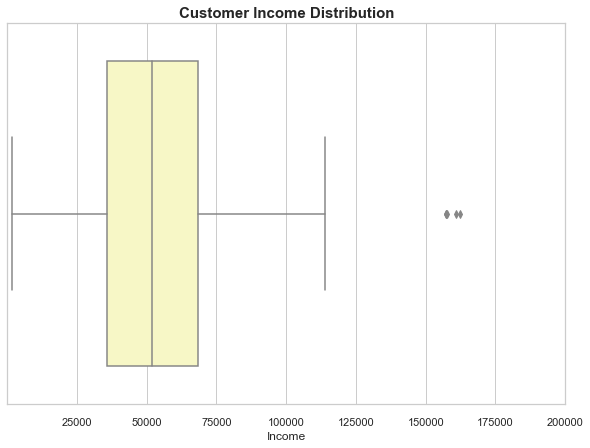

In [36]:
plt.figure(figsize=(10,7))
sns.set_theme(style="whitegrid") 
plt.xlim(1,200000) # Set x-axis scale 
ax = sns.boxplot(x=df["Income"],palette="Spectral")
plt.title('Customer Income Distribution', fontsize=15, weight = 'bold')# Add title
plt.show()

+ It's a good idea to see the income distribution at first. The boxplot shows the median income level is around 50k per year and there are couple outliers in the data.The 75th percentile is around 70k and 25th percentile is around 40k. There are some outliers in the data and I need to remove it for my models.

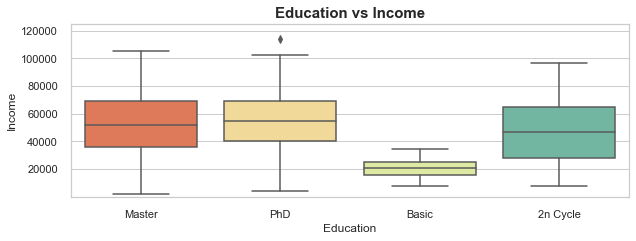

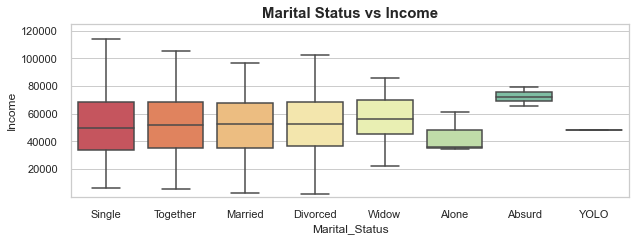

In [37]:
df['Education'] = df['Education'].replace("Graduation", 'Master')

# Create Education plot 
plt.figure(figsize=(10,7)) # Reset the plot showing size 
plt.subplot(2, 1, 1) # make two plots together 
sns.boxplot(x="Education", y="Income",data=df, dodge=True,palette="Spectral")
plt.ylim(1,125000) # Set y-axis scale 
plt.title('Education vs Income', fontsize=15, weight = 'bold')
plt.show()

# Create Marriage plot
plt.figure(figsize=(10,7))
plt.subplot(2, 1, 2)
sns.boxplot(x="Marital_Status", y="Income",data=df, dodge=True,palette="Spectral")
plt.ylim(1,125000)
plt.title('Marital Status vs Income', fontsize=15, weight = 'bold')
plt.show()

In the graph, My hypothesis on the customer who has higher education background will have higher income is true. PhD class has slightly higher median income than other education classes and couple super higher income in the data(couple outliers). Basic has the lowest median income level as I expected it. 2rd Cycle class means if a customer comes back to school after couple years of work and their income are close to master class. Income is an important factor to determine a customer's purchasing behavior so we will see it in the modeling section. 

My inital hypothesis on the marital Status will have positive impact on the income is not really true. People who are get married then got divorced have slightly higher income compared with people who are together and married. People who are absured have the highest income! This is an interesting factor to know and there are no clear positive/negative correlation between the marital status and income. 

#### Hypothesis II : Customer who has post-graduate education background and in a relationship will have higher Average Spend 

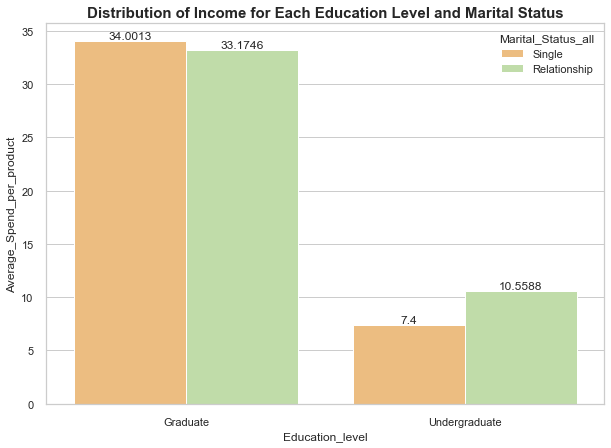

In [38]:
df1 = df.groupby(['Education_level','Marital_Status_all'])['Average_Spend_per_product'].mean().reset_index().sort_values('Average_Spend_per_product', ascending = False)

plt.figure(figsize=(10,7))

ax = sns.barplot(x = "Education_level", y = "Average_Spend_per_product", hue = "Marital_Status_all", data = df1,palette='Spectral')
plt.xticks()
for container in ax.containers: #Add number on the top of the plot 
    ax.bar_label(container)
ax.set_title('Distribution of Income for Each Education Level and Marital Status',weight='bold', size = 15)
plt.show()

Average spend per month and Income are positively correlated. As I expected, the higher the education level (average more than 20+ dollars per month) will lead to a higher income level and higher average spend. However, the marital status is an interesting factor because people who are together with higher education are spending less. However, people with lower education are spending more. My educated guess is because people who are in their higher education are more likely in a long-term relationship like marriage so their average spend per month is lower. People who are in college are more likely in a short-term relationship or a date so the cost are higher. 

#### Hypothesis III : Customers will have the tendency to spend their money in grocery (Meat, fish) than other categories(Gold).

In [39]:
df2 = df[['Education_level','Marital_Status_all','Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
id_vars = ["Education_level",
           "Marital_Status_all",
           "Income"
           ]
f_df = pd.melt(df2,
               id_vars = id_vars,
               var_name="Category",
               value_name="freq")
f_df.head()

Education_level Marital_Status_all  Income  Category  freq
0        Graduate             Single   58138  MntWines   635
1        Graduate             Single   46344  MntWines    11
2        Graduate       Relationship   71613  MntWines   426
3        Graduate       Relationship   26646  MntWines    11
4        Graduate       Relationship   58293  MntWines   173

In [40]:
result = f_df.groupby('Category')['freq'].sum().reset_index(name = 'Total_amount_spent').sort_values(by = 'Total_amount_spent')

fig = px.pie(result, values = 'Total_amount_spent', names = 'Category', width = 600, height = 600, template='seaborn')

# Add texts into each section and update the line to sepereate them 
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.8, 
                  marker = dict(line = dict(color = 'white', width = 4)),
                  hovertemplate = 'Clients: %{value}')

# Add plot title 
fig.update_layout(annotations = [dict(text = 'Percentage Spent <br>by Category', 
                                      x = 0.5, y = 0.5, font_size = 28, showarrow = False, 
                                      font_family = 'monospace',
                                      font_color = 'Black')],
                  showlegend = False)
                  
fig.show()

One of the most essential factors to understand customer personality is to see where they spent their money. The graph validated my hypothesis and people spent 50% of their money in wines and 28% in meat. Customer spent majority of their money in daily goods and groceries. 

#### Hypothesis IV: Customer who has kids will have higher purchase frequency and Web is the most popular purchase place 

In [41]:
df3 = df[['Education_level','Marital_Status_all','Income','Number_of_Kids','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']]
id_vars = ["Education_level",
           "Marital_Status_all",
           "Income",
           "Number_of_Kids"
           ]
f_df = pd.melt(df3,
               id_vars = id_vars,
               var_name="Purchase_place",
               value_name="Number_of_purchases")
f_df.head()

Education_level Marital_Status_all  Income  Number_of_Kids     Purchase_place  Number_of_purchases
0        Graduate             Single   58138               0  NumDealsPurchases                    3
1        Graduate             Single   46344               2  NumDealsPurchases                    2
2        Graduate       Relationship   71613               0  NumDealsPurchases                    1
3        Graduate       Relationship   26646               1  NumDealsPurchases                    2
4        Graduate       Relationship   58293               1  NumDealsPurchases                    5

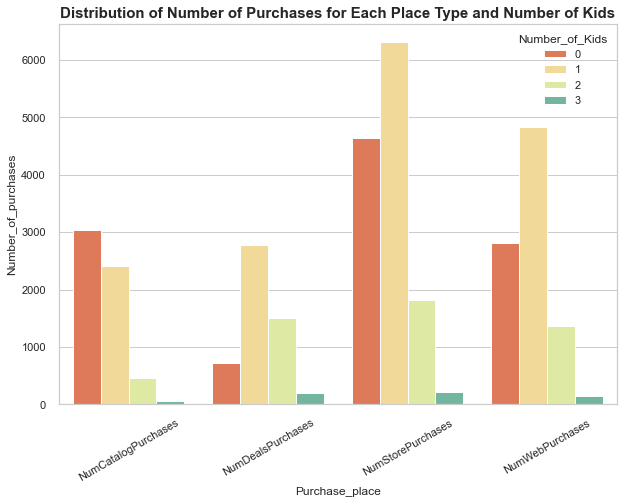

In [42]:
df4 = f_df.groupby(['Purchase_place','Number_of_Kids'])['Number_of_purchases'].sum().reset_index()

plt.figure(figsize=(10,7))
fig = sns.barplot(x = "Purchase_place", y = "Number_of_purchases", hue = "Number_of_Kids", data = df4,palette='Spectral')
plt.xticks(rotation=30)# Rotate the x-axis 
fig.set_title('Distribution of Number of Purchases for Each Place Type and Number of Kids',weight='bold', size = 15)
plt.show()

From the graph, Customer who has kids will have higher purchase frequency is True, so the purchase frequency and whether a customer has kid are postively correlated to each other. However, the correlation don't adds up because increase the number of kids will not directly increase the number of the purchases made by a cutomer.

Number of purchases made using a catalogue is the only purchase place poeple who don't have kids are made more purchase than people who have kids. Number of purchases made directly in stores is the most popular purchase place and web purchase is the second place. The data was collected before the Covid so I assume this has been changed right now and I think this is a good topic for the future analysis to compare between pre-covid and post-covid circumstance. Number of purchases made with a discount are slightly lower than other purchase chanels for couple reasons. First, time of a discount is limited. Second, necessities are mandatory so customer will make a purchase regardless of a discount.


#### Hypothesis V: People with high-frequency purchase tendency will have higher income level and higher total spend 

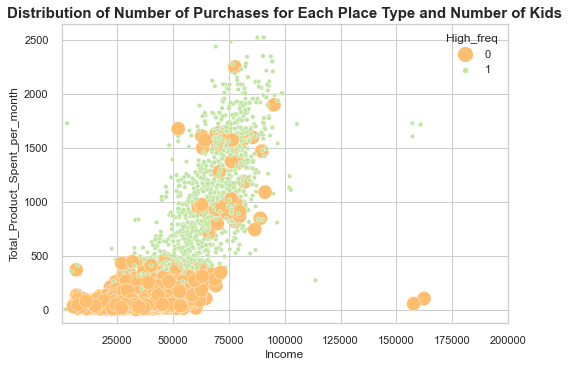

In [43]:
# Create the scatter plot 
ax = sns.scatterplot(
     data=df, x="Income", y="Total_Product_Spent_per_month", hue="High_freq", size="High_freq",
    sizes=(20, 200), legend="full", palette='Spectral'
)
ax.set_xlim(1,200000)

ax.set_title('Distribution of Number of Purchases for Each Place Type and Number of Kids',weight='bold', size = 15)
plt.show()

My hypothesis is people who are a high-frequency purchaser will have higher income level and higher total product spend per month. From the right graph, we can see that the green dots represent high purchase frequency customers and their distribution is slighty righter than orange dots(low purchase frequency customers), so their income level is higher as a group. On the other hand, majority of Green dots are in the upper section which means the higher total product spent per month. Of course, there are some outliers in the data, we have few people earn a little money but spent super high, and few people earn more money but spent super low. 

#### Hypothesis VI: Multiple marketing campaigns will increase the chance customer accept a promotion offer.

In [44]:
# Melt data from long to wide
df4 = df[['Education_level','Marital_Status_all','Income','Age','Response','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']]
id_vars = ["Education_level",
           "Marital_Status_all",
           "Income",
           "Age"
           ]
f_df = pd.melt(df4,
               id_vars = id_vars,
               var_name="Campaign_num",
               value_name="Accepted_offer")

# Map to change variable names
f_df['Campaign_num'] = f_df['Campaign_num'].map({
    'Response':'AcceptedCmp6',
    'AcceptedCmp1': 'AcceptedCmp1',
    'AcceptedCmp2':'AcceptedCmp2',
    'AcceptedCmp3':'AcceptedCmp3',
    'AcceptedCmp4':'AcceptedCmp4',
    'AcceptedCmp5':'AcceptedCmp5'
})
f_df.head()

Education_level Marital_Status_all  Income  Age  Campaign_num  Accepted_offer
0        Graduate             Single   58138   59  AcceptedCmp6               1
1        Graduate             Single   46344   62  AcceptedCmp6               0
2        Graduate       Relationship   71613   51  AcceptedCmp6               0
3        Graduate       Relationship   26646   32  AcceptedCmp6               0
4        Graduate       Relationship   58293   35  AcceptedCmp6               0

In [45]:
def age_buckets(x): 
    if x < 30:
        return '18-29' 
    elif x < 40: 
        return '30-39' 
    elif x < 50: 
        return '40-49' 
    elif x < 60: 
        return '50-59' 
    elif x < 70: 
        return '60-69' 
    elif x >=70: 
        return '70+' 
    else: 
        return 'other'
f_df['Age_range'] = f_df['Age'].apply(age_buckets)

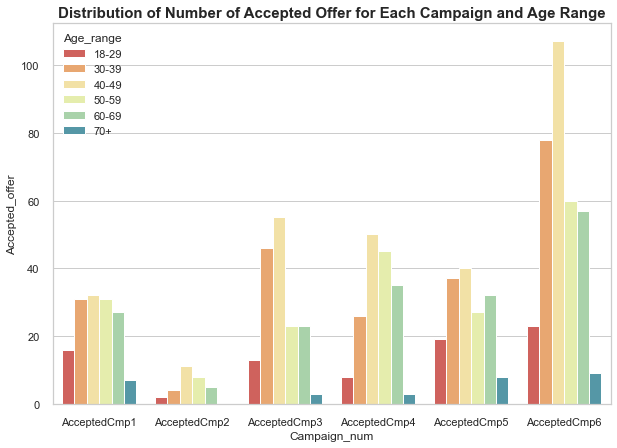

In [46]:
df5 = f_df.groupby(['Campaign_num','Age_range'])['Accepted_offer'].sum().reset_index()
df5
plt.figure(figsize=(10,7))
fig = sns.barplot(x = "Campaign_num", y = "Accepted_offer", hue = "Age_range", data = df5,palette='Spectral')
fig.set_title('Distribution of Number of Accepted Offer for Each Campaign and Age Range',weight='bold', size = 15)
plt.show()

From the graph, there is a positive correlation between the number of campaigns and number of accepted offer from campaigns in high level. Thus, I will not reject my null hypothesis. AcceptedCmp6 means 1 if customer accepted the offer in the last campaign, and there are more customers who accepted the last campaign than first campaign. Of course, the second campaign has the lowest acceptance rate and different campigns have different performance, but we can see there is a increase trend in the general level. 
Another interesting factor is age of customer. People who aged between 40 to 49 have the highest rate to accept an offer from a campaign. Customers who are age more than 70 have the lowest rate. People who are old will have less interest to purchase a lot of products so they will have less chance to accept an offer from the marketing campaign. customers are between 30 to 50 will have higher demand and they will try to save their money, so their offer acceptance rate will be higher than others. 

#### Hypothesis VI: Total Product Spent is Correlated to Days since a Customer and Income

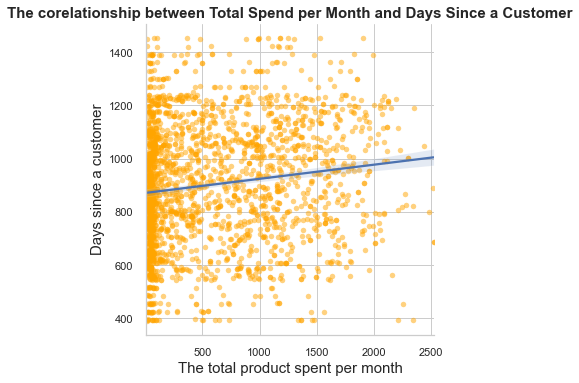

In [47]:
# Create the lmplot
sns.lmplot(x='Total_Product_Spent_per_month',y='Days_since_client',fit_reg=True,scatter_kws={"color":"orange","alpha":0.5
                                                                               ,"s":30},data=df)
plt.title('The corelationship between Total Spend per Month and Days Since a Customer', fontsize=15,weight='bold')
plt.xlabel('The total product spent per month',size=15)
plt.ylabel('Days since a customer',size=15)
plt.show()

There are no obvious relationship between the total product spent per month and days since a customer, so I will reject my null hypothesis.

In [48]:
print('The correlation between the total product spend per month and Days since a customer is: '+ str(df['Days_since_client'].corr(df['Total_Product_Spent_per_month'])))

The correlation between the total product spend per month and Days since a customer is: 0.13740024937226805


It turns out the correlation is positive but relatively low.

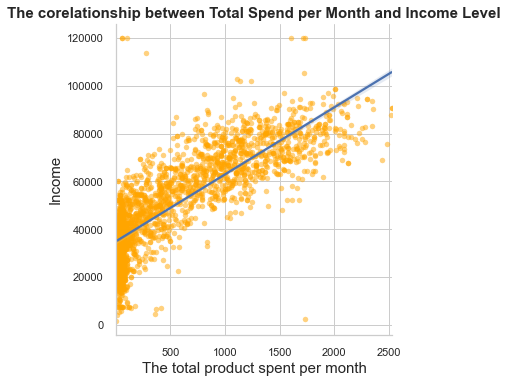

In [49]:
df['Income'] = np.where(df['Income'] > 120000, 120000, df['Income']) # Remove outlier 

# Create the lmlplot 
sns.lmplot(x='Total_Product_Spent_per_month',y='Income',fit_reg=True,scatter_kws={"color":"orange","alpha":0.5
                                                                               ,"s":30},data=df)
plt.title('The corelationship between Total Spend per Month and Income Level', fontsize=15,weight='bold')
plt.xlabel('The total product spent per month',size=15)
plt.ylabel('Income',size=15)
plt.show()

The graph shows some extend of correlation so I want to do some more analysis to see its actual correlation in number

In [50]:
print('The correlation between the total product spend per month and Income is: ' + str(df['Income'].corr(df['Total_Product_Spent_per_month'])))

The correlation between the total product spend per month and Income is: 0.8101980102758373


It turns out that the loss incurred and the insurance premium is positive correlated

### Customer Churn Analysis Data - EDA

#### Hypothesis I: Customer churn rate will be heavily impacted by monthly charges or total charges 

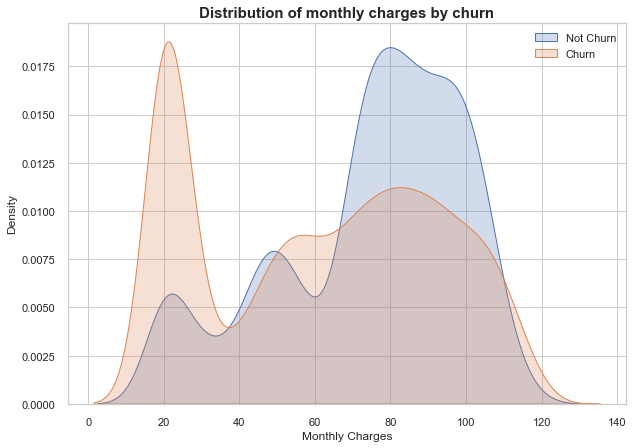

In [51]:
customer_churned = df_churn.loc[df_churn['Churn'] == 1]
customer_not_churned = df_churn.loc[df_churn['Churn'] == 0]

# Create denisity plot 
plt.figure(figsize=(10,7))
ax = sns.kdeplot(customer_churned['MonthlyCharges'],
                shade = True,palette='Spectral')
ax = sns.kdeplot(customer_not_churned['MonthlyCharges'],
                ax =ax,palette='Spectral', shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right') # Show legend 
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn',weight='bold', size = 15)
plt.show()

The graph validated my hypothesis which is customer churn rate will be heavily impacted by monthly charges. The orange shade is right-skewed, so majority of churned customers have monthly charges (The amount charged to the customer monthly) around 20. The blue shade is left-skewed and majority unchurned customer have higher monthly chrages around 60 - 100 dollars. 

In summary, the higher amount charged to the customer monthly, the lower chance a customer will churn, and vice-versa. It's a negative correlation. 

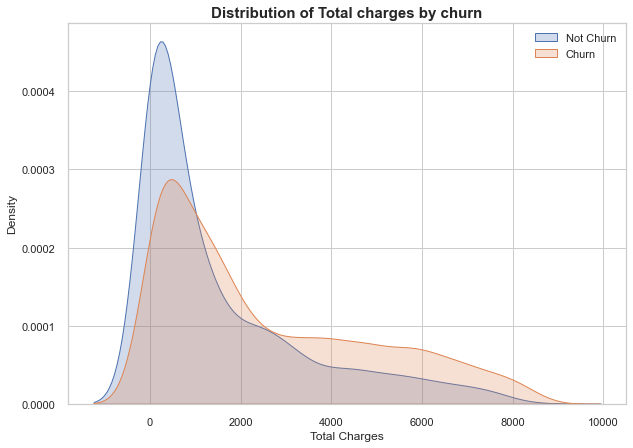

In [52]:
# Create the kde plot for total charges 
customer_churned = df_churn.loc[df_churn['Churn'] == 1]
customer_not_churned = df_churn.loc[df_churn['Churn'] == 0]

# Create denisity plot 
plt.figure(figsize=(10,7))
ax = sns.kdeplot(customer_churned['TotalCharges'],
                shade = True,palette='Spectral')
ax = sns.kdeplot(customer_not_churned['TotalCharges'],
                ax =ax,palette='Spectral', shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right') # Show legend 
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total charges by churn',weight='bold', size = 15)
plt.show()

The graph validated my hypothesis which is customer churn rate will be impacted by total charges. Both orange and blue shapes are right-skewed and their patterns are similiar to each other. 

In summary, It seems that there is higher churn when the total charges are lower.

#### Hypothesis II: Longer contract term of the customer will have positive impact on the churn rate 

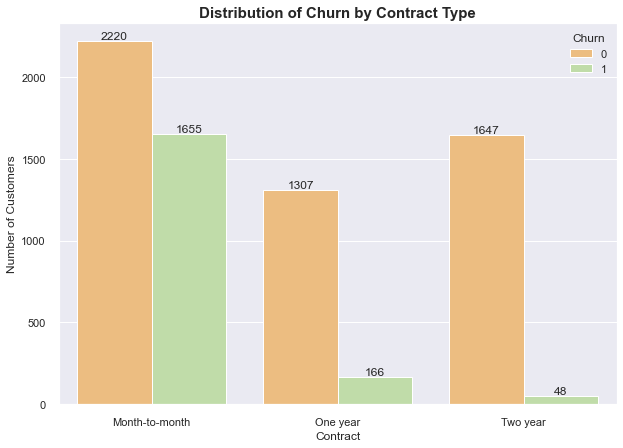

In [53]:
churn = df_churn.groupby(['Contract', 'Churn']).size().reset_index(name = 'Number of Customers')

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# set the figure size
plt.figure(figsize=(10, 7))



fig = sns.barplot(x = "Contract", y = "Number of Customers", hue = "Churn", data = churn,palette='Spectral')
fig.set_title('Distribution of Number of Accepted Offer for Each Campaign and Age Range',weight='bold', size = 15)
plt.xticks()

for container in fig.containers: #Add number on the top of the plot 
    fig.bar_label(container)
fig.set_title('Distribution of Churn by Contract Type',weight='bold', size = 15)
plt.show()

From the graph, the highest churn rate is when the contract term of the customer is month-to-month, the lowest churn rate is when the contract term is two year. There is a strong negative correlation between the contract term and customer churn rate because the longer the contract term, the lower the customer churn rate will be. It's a proof of my null hypothesis and I think it's matching my expectation. Customers will less likely to churn when they have a longer contract vs a shorter contract. 

#### Hypothesis III: Customer churn rate will be affected by paymentMethod 

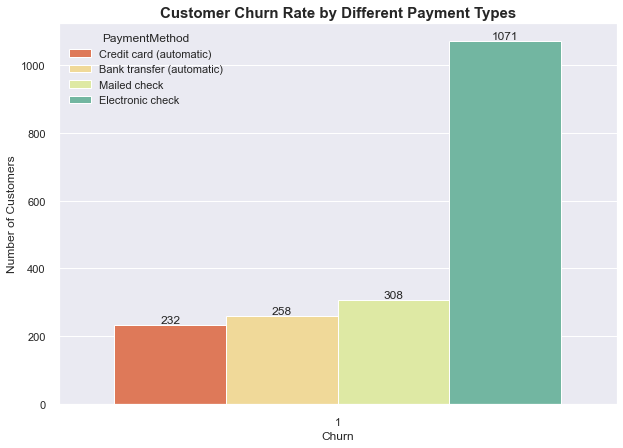

In [54]:
df6 = df_churn.groupby(['PaymentMethod','Churn']).count()['gender'].reset_index(name = 'Number of Customers')
churned = df6.loc[df6.Churn == 1].sort_values(by = 'Number of Customers')
# Create the bar chart 
plt.figure(figsize=(10,7))
fig = sns.barplot(x = "Churn", y = "Number of Customers", hue = "PaymentMethod", data = churned,palette='Spectral')
fig.set_title('Customer Churn Rate by Different Payment Types',weight='bold', size = 15)
plt.xticks()
for container in fig.containers: #Add number on the top of the plot 
    fig.bar_label(container)
plt.show()

From the graph, Customer churn rate was heavily affected by different payment Methods. Among all of the churned customers, automatic payments will significantly decrease the churn rate compared to non-automatic payments.However, this is meeting my expectation. A customer set an automatic payment will more likely to pay for their subscription or other services, and they will not forget to pay for their bills as well. Customers who pays with electronic check have significantly higher churn rate. Thus, the payment methods is an important variable to affect the churn rate of a customer and it's also important for me to put into my model in the later section 

#### Hypothesis IV: Customer churn rate will have a unbalanced distribution 

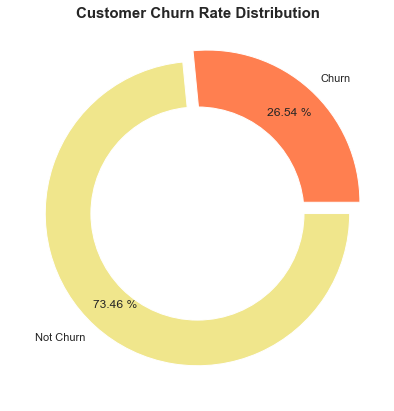

In [55]:
churn = df_churn[df_churn['Churn'] == 1].count()[0]
Not_churn = df_churn[df_churn['Churn'] == 0].count()[0]

# Set size
plt.figure(figsize=(10,7))

# Create pie chart
labels = ['Churn','Not Churn']
colors = ['coral','khaki']
explode = [0.1,0]
plt.pie([churn,Not_churn],labels = labels,autopct = '%.2f %%',pctdistance = 0.8,explode = explode, colors = colors)
plt.title('Customer Churn Rate Distribution',weight='bold', size = 15)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

The graph has validated my hypothesis. In the data, 74% of the customers do not churn. There are only 27% of the customers churnd,so the data is skewed which it's an inbalanced label. We can aniticipate that there are more customers will not churn, so it's important to deal with the skewness of the data before building the model because the model will have the tendency to predict on the majority class, and there will be more false negatives (Type II error) in our prediction.

#### Hypothesis V: Customer churn rate will be affected by senority level 

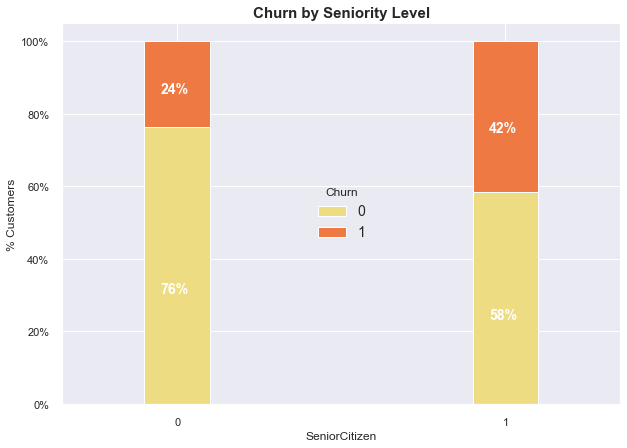

In [56]:
import matplotlib.ticker as mtick # For specifying the axes tick format
churn = df_churn.groupby(['SeniorCitizen','Churn']).size().unstack()
# Create the stacked bar plot
colors = ['#EEDC82','#EE7942']
ax = (churn.T*100.0 / churn.T.sum()).T.plot(kind='bar',
                                            width = 0.2,
                                            stacked = True,
                                            rot = 0, 
                                            figsize = (10,7),
                                            color = colors)


ax.yaxis.set_major_formatter(mtick.PercentFormatter()) # Set the y-axis to be XX%
ax.legend(loc='center',prop={'size':14},title = 'Churn') # Set the legend in the middle
ax.set_ylabel('% Customers') 
ax.set_title('Churn by Seniority Level',size = 15, weight = 'bold')

# add the percentage labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)
    
    
# Reference to show the percentage on the bar: https://stackoverflow.com/questions/57453959/how-to-show-percentages-on-the-stacked-bar-chart-in-python-3-x

First, the definition on the Senior Citizens is Whether the customer is a senior citizen or not. The graph validated my hypothesis because the senior citizens have almost double the churn rate than younger population. I think it's a very interesting finding and this variable could be an important factor to influence the customer churn rate. 

# Machine Learning Models

#### Goal of the models 
The goal of this section is use machine learning models to predict customer behaviors and help us to better target our customers in a more effecient and accurate way.I am planning to build three models: 

1. `K-mean Clustering` from Customer personality data 


2. `Logistic regression` and `Random Forest` from Customer churn data 


#### Model Details 
+ Why I choose the `K-mean` model? 

I choose K-mean from Customer personality data because the dataset is unlabeled and I would like to cluster different customers together to see their common personalities. K-mean is less computation expensive compare to other clustering techniques, and requires less storage and faster process.

+ Why I choose the `Logistic regression` and `Random Forest` model? 

I choose LR and RF from Customer churn data because the dataset is labeled and I would like to predict on the customer churn rate(churn rate is a binary variable 0 and 1). LR and RF are good for classification prediction to classify differnt categories and they are pretty straight foward and easy to implement as well. 



#### Model Purpose
In order to better target a customer, there are two ways in general:
1. Acquire more customers 
2. Keep more existing customers 

`K-mean clustering` is able to segment customers into different clusters. The model will be able to identify unqiue characteristics for different groups of customer and I will able to answer my problem in the beginning which is how could a company differeiate customers and tailor different marketing strategy to sell their products. Thus, K-mean model will help me to understand how could I better target a customer. 

`LR and RF` are able to predict customer churn rate so I will able to understand what are some important factors will influence a customer to leave a product and become a churned customer. Thus, these two models will help me to understand how could a company keep the retention rate high and reduce the churn rate. 
 

#### Model Variable Selection 

`K-mean Clustering`: I am planning to use a customer's Education, Marital_Status, Income, Number_of_Kids, Total_Product_Spent_per_month, Total_Accept_Offer, Total_Purchase_per_month, Age, Average_Spend_per_product, Deals_Purchases, Average_Spend_per_product as my variables(They all come from my EDA analysis) to create my clustering analysis. Clustering is unsupervised machine learning method so I do not need my y-variable.

`Logistic Regression and Random Forest`: Both models are supervised machine learning models. I will use churn rate as my independend variable(y-variable) and rest of the variables as my depended variables(I am planning to use Gridsearch from sklearn document to reduce data dimensions. 


### K-Mean Clustering 
1. Variable selection & Scaling 
2. Elbow Method and Silhouette Score to determine the optimal K 
2. Model Construction 
4. Result Analysis

Reference: 
- [Elbow Method](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540)
- [Correlation Map](https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e)
- [K-mean Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- [Silhouette Score](https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam)

#### Variable transformation and Scaling

In [57]:
# Variable Selection
selected_cols = ['Education_level', 'Marital_Status_all','Number_of_Kids',
                 'Total_Product_Spent_per_month','Total_Purchase_per_month', 'Total_Accept_Offer','Deals_Purchases', 
                'Age','Income','Average_Spend_per_product','Complain', ]
personality_df = df[selected_cols]
personality_df.head()

Education_level Marital_Status_all  Number_of_Kids  Total_Product_Spent_per_month  Total_Purchase_per_month  Total_Accept_Offer  Deals_Purchases  Age  Income  Average_Spend_per_product  Complain
0        Graduate             Single               0                           1617                        25                   1               12   59   58138                         64         0
1        Graduate             Single               2                             27                         6                   0               33   62   46344                          4         0
2        Graduate       Relationship               0                            776                        21                   0                4   51   71613                         37         0
3        Graduate       Relationship               1                             53                         8                   0               25   32   26646                          6         0
4        Graduate       Relationship               1                            422                        19                   0               26   35   58293                         22         0

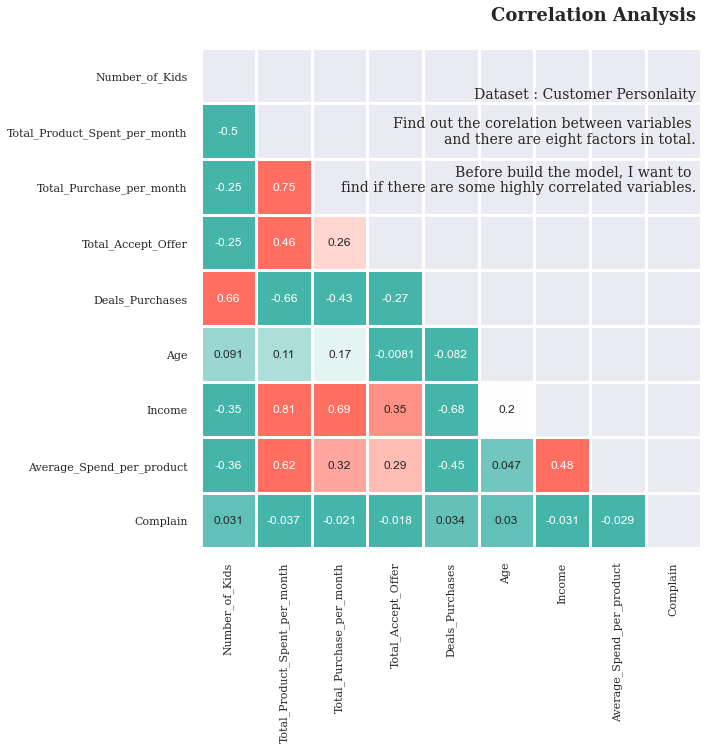

In [58]:
# Correlation Matrix 
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
corr = personality_df.corr(method='pearson')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

colors = ["#45b5aa","white", "#ff6f61"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
# Creat the heatmap 
sns.heatmap(corr, 
            square=True, 
            mask=mask,
            linewidth=2.5, 
            vmax=0.4, vmin=0, 
            cmap=cmap, 
            cbar=False, 
            ax=ax,annot=True)

ax.set_yticklabels(ax.get_xticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.spines['top'].set_visible(True)

# Add Fig Text 
fig.text(0.97, 1.02, 'Correlation Analysis', fontweight='bold', fontfamily='serif', fontsize=18, ha='right')    
fig.text(0.97, 0.912, 'Dataset : Customer Personlaity', fontweight='light', fontfamily='serif', fontsize=14, ha='right')    

fig.text(0.97, 0.91, '''
Find out the corelation between variables 
and there are eight factors in total.

Before build the model, I want to 
find if there are some highly correlated variables.''', 
         fontweight='light', fontfamily='serif', fontsize=14, va='top', ha='right') 

plt.tight_layout()
plt.show()

From the graph, the results are meeting my expectation. Rule of thumb is we have correlation higher or equal to 0.75 (75%) is considered two variables are highly correlated to each other. As a result, we have two strong positively correlated varaibles which are total purchase per month and total product spend per month; Income and total product spend per month. In common sense, a customer who has higher income level will have higher purchasing power so it will potential lead to a higher product spend and the more products bought will lead to higher product spend per month as well. 

In [59]:
#Eigen vector of a correlation matrix.
multicollinearity, V=np.linalg.eig(corr)
multicollinearity
        

array([3.95460154, 1.17096992, 0.1123479 , 0.16984155, 0.37089697,
       0.99240534, 0.85262353, 0.72848125, 0.647832  ])

From the Eigen Vector result, we can see there are no variable close to 0, so it means that there is no multicollinearity exists in the data.

In [60]:
# Transfrom the categorical vars (select non-numerical columns)
categorical_cols = []

for i in personality_df.columns:
    if personality_df[i].dtypes == 'object':
        categorical_cols.append(i)
print(categorical_cols)      

['Education_level', 'Marital_Status_all']


In [61]:
label_encoder = LabelEncoder()
for i in categorical_cols:
    personality_df[i] = personality_df[[i]].apply(label_encoder.fit_transform)

In [62]:
personality_df.head()

Education_level  Marital_Status_all  Number_of_Kids  Total_Product_Spent_per_month  Total_Purchase_per_month  Total_Accept_Offer  Deals_Purchases  Age  Income  Average_Spend_per_product  Complain
0                0                   1               0                           1617                        25                   1               12   59   58138                         64         0
1                0                   1               2                             27                         6                   0               33   62   46344                          4         0
2                0                   0               0                            776                        21                   0                4   51   71613                         37         0
3                0                   0               1                             53                         8                   0               25   32   26646                          6         0
4                0                   0               1                            422                        19                   0               26   35   58293                         22         0

There are three popular ways for scaling: 
- **standardizing**: subtract each variable by its mean, then divide by its standard deviation, (also called z-standardization) 
- **normalizing**: scale each variable to have length (or "norm") 1
- **min/max scaling**: scale each variable so that all values are between 0 and 1

I will use standardizing so my result will have negative values, and I decided to use one of the package from Sk-Learn which its *StandardScaler*

In [63]:
scaled_features = StandardScaler().fit_transform(personality_df.values)
scaled_personality_df = pd.DataFrame(scaled_features, index=personality_df.index, columns=personality_df.columns)
scaled_personality_df[:5]

# # personality_df_scaled = (personality_df.
#                   sub(personality_df.mean(), axis=1).
#                   divide(personality_df.std(), axis=1))
# personality_df_scaled.head()

Education_level  Marital_Status_all  Number_of_Kids  Total_Product_Spent_per_month  Total_Purchase_per_month  Total_Accept_Offer  Deals_Purchases       Age    Income  Average_Spend_per_product  Complain
0        -0.157315            1.348952       -1.266401                       1.677625                  1.320622            0.619936        -0.515740  0.985667  0.301075                   0.690960 -0.097369
1        -0.157315            1.348952        1.394946                      -0.963051                 -1.160925           -0.502474         1.368272  1.236012 -0.265083                  -0.641480 -0.097369
2        -0.157315           -0.741316       -1.266401                       0.280890                  0.798191           -0.502474        -1.233459  0.318081  0.947928                   0.091362 -0.097369
3        -0.157315           -0.741316        0.064272                      -0.919870                 -0.899710           -0.502474         0.650553 -1.267436 -1.210664                  -0.597066 -0.097369
4        -0.157315           -0.741316        0.064272                      -0.307034                  0.536975           -0.502474         0.740268 -1.017091  0.308516                  -0.241748 -0.097369

#### Elbow Method & Silhouette Score

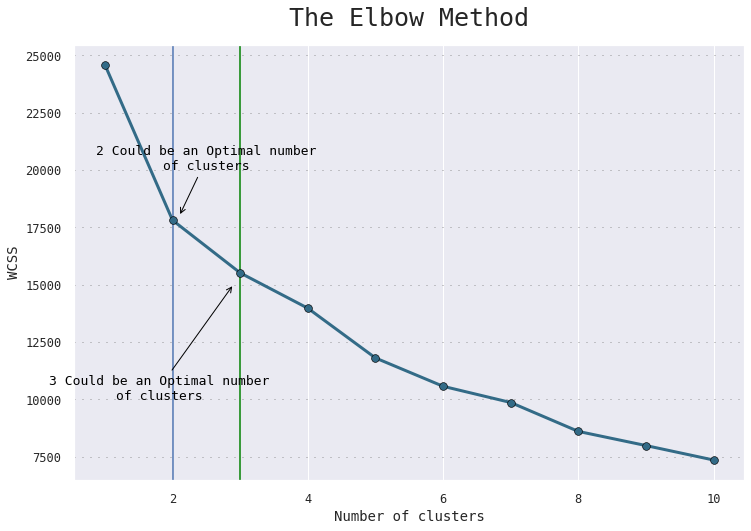

In [64]:
# Apply Elbow method
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, random_state = 10)
    km.fit(scaled_personality_df)
    wcss.append(km.inertia_)
    
# Set up the title    
plt.figure(figsize = (12, 8))
plt.title('The Elbow Method', size = 25, y = 1.03, fontname = 'monospace')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 0.8, zorder = 0,  dashes = (1,7))

# Create the plot
a = sns.lineplot(x = range(1, 11), y = wcss, color = '#336b87', linewidth = 3)
sns.scatterplot(x = range(1, 11), y = wcss, color = '#336b87', s = 60, edgecolor = 'black', zorder = 5)
plt.ylabel('WCSS', size = 14, fontname = 'monospace')
plt.xlabel('Number of clusters', size = 14, fontname = 'monospace')
plt.xticks(size = 12, fontname = 'monospace')
plt.yticks(size = 12, fontname = 'monospace')

# Create the arrow 
plt.annotate('''2 Could be an Optimal number
of clusters''', xy = (2.1, 18000), xytext = (2.5, 20000),
             arrowprops = dict(facecolor = 'steelblue', arrowstyle = "->",color = 'black'), 
             fontsize = 13, fontfamily = 'monospace', ha = 'center', color = 'black')

plt.annotate('''3 Could be an Optimal number
of clusters''', xy = (2.9, 15000), xytext = (1.8, 10000),
             arrowprops = dict(facecolor = 'steelblue', arrowstyle = "->",color = 'black'), 
             fontsize = 13, fontfamily = 'monospace', ha = 'center', color = 'black')

# Create the vline
plt.axvline(3, 1, 0, color = 'green')
plt.axvline(2, 1, 0)

plt.show()

From the elbow method, I can either choose 3 or 2 as my optimal clusters because I can see there are two "Elbow Point". In term of the situation, I will use second method which is Silhouette Score to help me to determine the optimal K. 

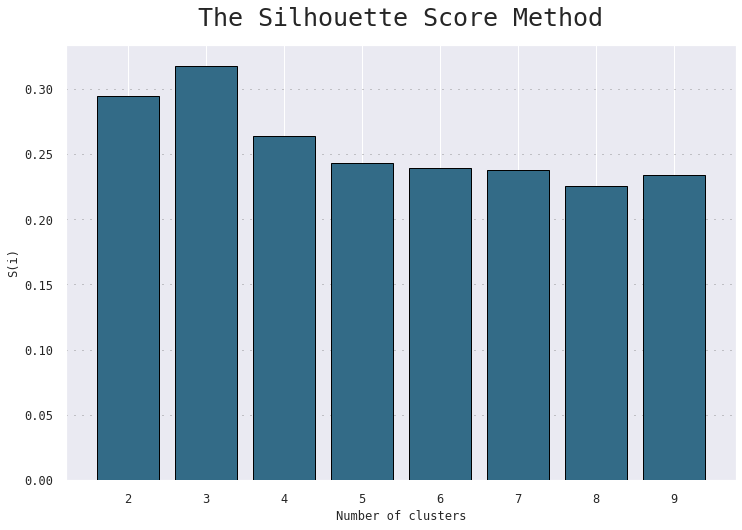

In [65]:
# Apply silhouette_scores method
silhouette_scores = []
for i in range(2,10):
    SS=KMeans(n_clusters=i, random_state=0)
    c = SS.fit_predict(scaled_personality_df)
    silhouette_scores.append(silhouette_score(scaled_personality_df, SS.fit_predict(scaled_personality_df))) 
    

# Set up the title    
plt.figure(figsize = (12, 8))
plt.title('The Silhouette Score Method', size = 25, y = 1.03, fontname = 'monospace')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 0.8, zorder = 0,  dashes = (1,7))    
    
    
# Create the plot 
plt.bar(range(2,10), silhouette_scores,edgecolor = 'black', zorder = 5, color = '#336b87') 
plt.xlabel('Number of clusters', fontsize = 12,fontname = 'monospace') 
plt.ylabel('S(i)', fontsize = 12,fontname = 'monospace') 
plt.xticks(size = 12, fontname = 'monospace')
plt.yticks(size = 12, fontname = 'monospace')
plt.show()

- Silhouette score for a set of sample data points is used to measure how dense and well-separated the clusters are.
- The silhouette score falls within the range [-1, 1].
- The silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect.
- [Details on Silhouette Score](https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam)

In [66]:
silhouette_scores

[0.2944189749959098,
 0.3179662555573218,
 0.26418563131513045,
 0.2428762664594691,
 0.23916730126054353,
 0.23811849760726875,
 0.22550869550661626,
 0.23420488602281367]

According to both two methods, I decided to use **3 as my optimal number of clustering**.

In [67]:
# K-Means 
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_personality_df)
pred = kmeans.predict(scaled_personality_df)


# Appending cluster values into main df
personality_df['Cluster'] = pred + 1

In [68]:
personality_df.head()

Education_level  Marital_Status_all  Number_of_Kids  Total_Product_Spent_per_month  Total_Purchase_per_month  Total_Accept_Offer  Deals_Purchases  Age  Income  Average_Spend_per_product  Complain  Cluster
0                0                   1               0                           1617                        25                   1               12   59   58138                         64         0        2
1                0                   1               2                             27                         6                   0               33   62   46344                          4         0        1
2                0                   0               0                            776                        21                   0                4   51   71613                         37         0        2
3                0                   0               1                             53                         8                   0               25   32   26646                          6         0        1
4                0                   0               1                            422                        19                   0               26   35   58293                         22         0        1

Next, I want to assign differet names for different Clusters based on their purchase frequncy on products to determine whether a customer is very active or not.

In [69]:
display(personality_df[personality_df['Cluster'] == 1]['Total_Purchase_per_month'].mean()) 
display(personality_df[personality_df['Cluster'] == 2]['Total_Purchase_per_month'].mean()) 
display(personality_df[personality_df['Cluster'] == 3]['Total_Purchase_per_month'].mean()) 

10.307320997586483

21.405750798722046

7.018518518518518

- Cluster 1 has the second largest purchase frequency, so I will assign them to normal clients 
- Cluster 2 has the highest purchase frequency, so they are active clients
- Cluster 3 has the least purchase frequency, so they are prospect clients 

In [70]:
# Use map to rename cluster names
rename_clust = {
    1: 'Normal Customer',
    2: 'Active Customer',
    3: 'Prospect Customer'
}
personality_df['Cluster'] = personality_df['Cluster'].map(rename_clust)
personality_df.head()

Education_level  Marital_Status_all  Number_of_Kids  Total_Product_Spent_per_month  Total_Purchase_per_month  Total_Accept_Offer  Deals_Purchases  Age  Income  Average_Spend_per_product  Complain          Cluster
0                0                   1               0                           1617                        25                   1               12   59   58138                         64         0  Active Customer
1                0                   1               2                             27                         6                   0               33   62   46344                          4         0  Normal Customer
2                0                   0               0                            776                        21                   0                4   51   71613                         37         0  Active Customer
3                0                   0               1                             53                         8                   0               25   32   26646                          6         0  Normal Customer
4                0                   0               1                            422                        19                   0               26   35   58293                         22         0  Normal Customer

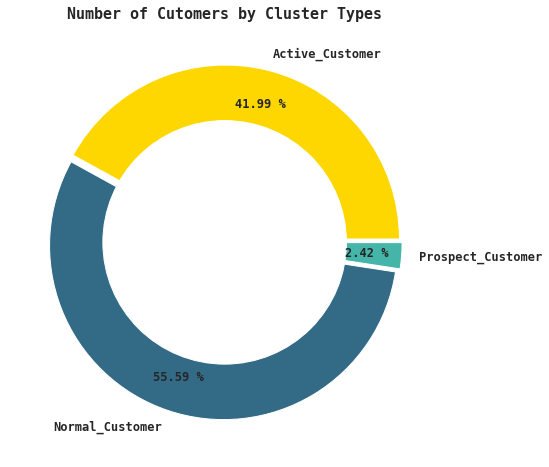

In [71]:
Active_client = personality_df[personality_df['Cluster'] == 'Active Customer'].count()[0]
Normal_client = personality_df[personality_df['Cluster'] == 'Normal Customer'].count()[0]
Prospect_client = personality_df[personality_df['Cluster'] == 'Prospect Customer'].count()[0]

# change the default font family
plt.rcParams.update({'font.family':'monospace'})

# Set size
plt.figure(figsize=(12,8))

# Create pie chart
labels = ['Active_Customer','Normal_Customer', 'Prospect_Customer']
colors = ['#FFD700','#336b87','#45b5aa']
explode = [0.02,0.02,0.02]
plt.pie([Active_client,Normal_client,Prospect_client],labels = labels,autopct = '%.2f %%',pctdistance = 0.8,
        explode = explode, colors = colors, textprops={'fontsize': 12, 'weight': 'bold'})
plt.title('Number of Cutomers by Cluster Types',weight='bold', size = 15,fontname = 'monospace')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

After I ran the k-mean clustering on customer personality data, we have three different clusters to differeciate different types of customers. 42% of them are active customers based on their purchase frequncy. There are 56% of them are normal customers and 3% are prospect customer in the future. 

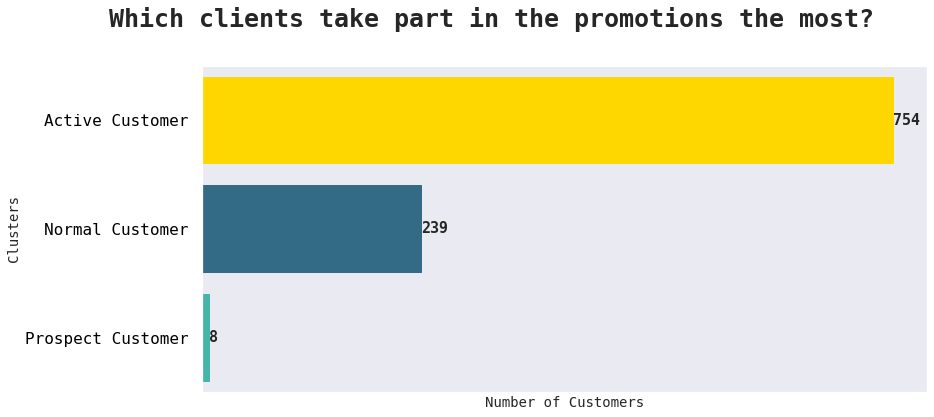

In [72]:
# Create the bar chart
fig = plt.figure(figsize = (13, 6))
plt.title('Which clients take part in the promotions the most?', size = 25, x = 0.4, y = 1.1, fontname = 'monospace',fontweight='bold')
fig = sns.barplot(data = personality_df.groupby(['Cluster']).agg({'Total_Accept_Offer': 'sum'}).reset_index(), 
                x = 'Total_Accept_Offer', y = 'Cluster', color = 'gold')
plt.xticks([])
plt.yticks(fontname = 'monospace', size = 16, color = 'black')
plt.xlabel('Number of Customers',fontname = 'monospace',fontsize =14)
plt.ylabel('Clusters',fontname = 'monospace',fontsize =14)

# new helper method to auto-label bars
fig.bar_label(fig.containers[0],fontweight='bold', fontsize =15,fontname = 'monospace')

# Assign color to different bars   
for i in fig.patches:
    if i.get_width() == 239:
        i.set_color('#336b87')
    elif i.get_width() == 754:
        i.set_color('#FFD700')
    else:
        i.set_color('#45b5aa')

    

From the graph, we can see majority active clients are willing to take promotions, which is number of accepted offer from campaigns in high level. In high level, our data approves the importance of the marketing campaigns(Including mutiple campaigns as well). For a company, the marketing campaigns are able to make customers more active and potentialy make more purchases. For detailed marketing strategy, a company needs to based on the specific customer data, industry data and their specific product data to tailor their marketing campign strategy to do customization. 

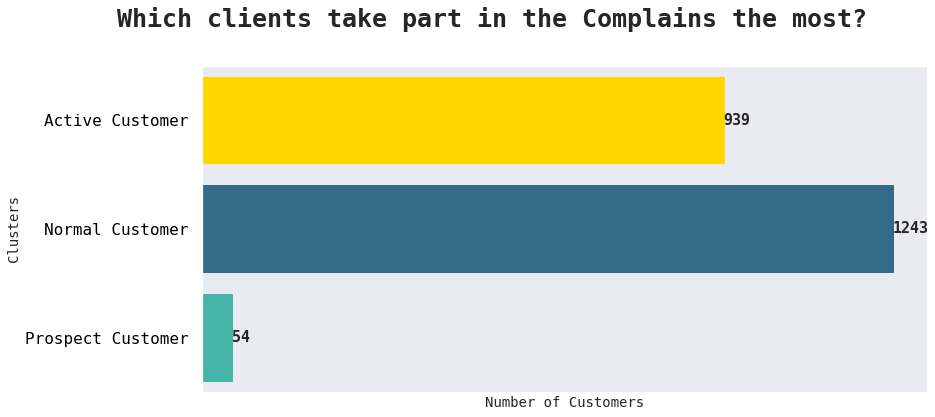

In [73]:
# Create the bar chart
fig = plt.figure(figsize = (13, 6))
plt.title('Which clients take part in the Complains the most?', size = 25, x = 0.4, y = 1.1, fontname = 'monospace',fontweight='bold')
fig = sns.barplot(data = personality_df.groupby('Cluster').count()['Complain'].reset_index(name ='count'), 
                x = 'count', y = 'Cluster', color = 'gold')
plt.xticks([])
plt.yticks(fontname = 'monospace', size = 16, color = 'black')
plt.xlabel('Number of Customers',fontname = 'monospace',fontsize =14)
plt.ylabel('Clusters',fontname = 'monospace',fontsize =14)

# new helper method to auto-label bars
fig.bar_label(fig.containers[0],fontweight='bold', fontsize =15,fontname = 'monospace')

# Assign color to different bars   
for i in fig.patches:
    if i.get_width() == 1243:
        i.set_color('#336b87')
    elif i.get_width() == 939:
        i.set_color('#FFD700')
    else:
        i.set_color('#45b5aa')


From the graph, we can see that normal clients are actually have more complains than active clients. The definition of complains in the data is customer have negative comments on the products or return a purchased product. In high level, our data approved the importance of the customer service. Majority of complains are actually coming from normal clients, so it's the key to address their questions and take in action from their complains will help a company to be very successful. 

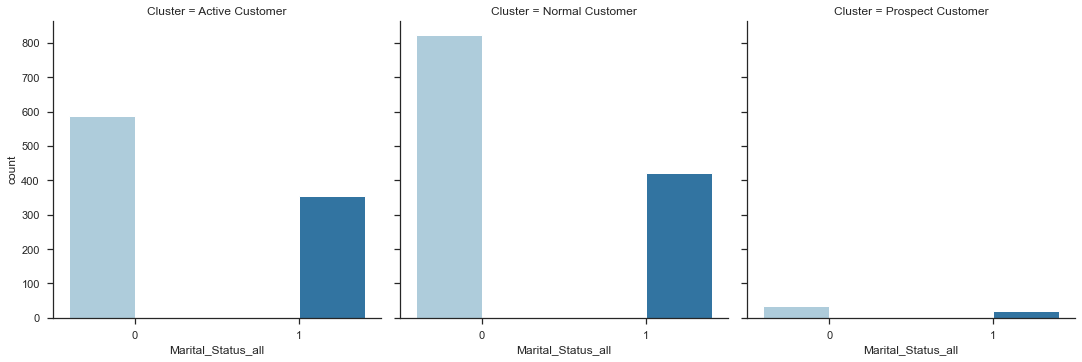

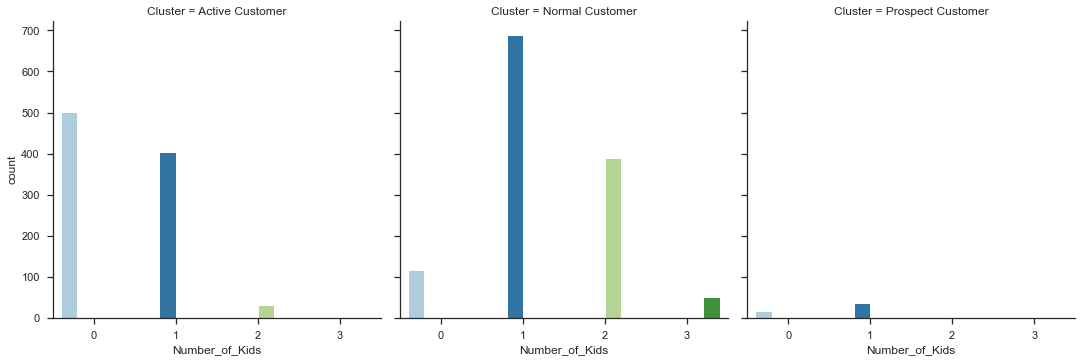

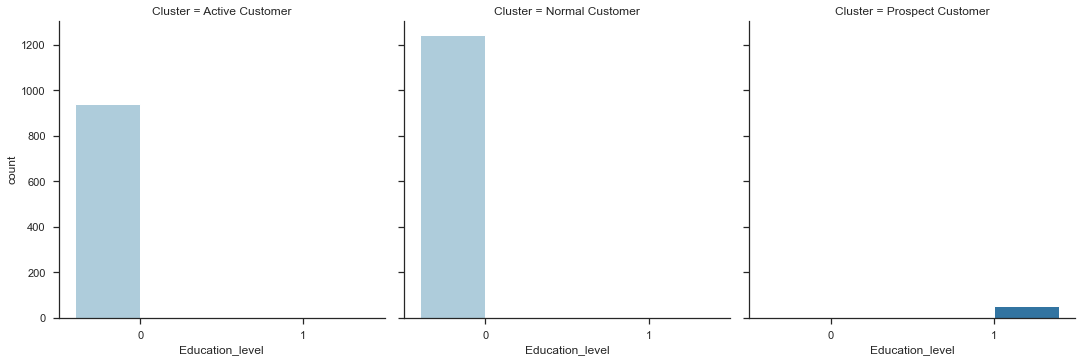

In [74]:
sns.set(style="ticks")

fig, axs = plt.subplots(1,3)

sns.catplot(x='Marital_Status_all', hue='Marital_Status_all', col='Cluster', 
                 data=personality_df, kind='count',palette='Paired',ax=axs[0])
sns.catplot(x='Number_of_Kids', hue='Number_of_Kids', col='Cluster', 
                 data=personality_df, kind='count',palette='Paired',ax=axs[1])
sns.catplot(x='Education_level', hue='Education_level', col='Cluster', 
                 data=personality_df, kind='count',palette='Paired',ax=axs[2])
plt.close(0)
plt.close(1)

#https://stackoverflow.com/questions/56937029/plot-two-catplots-in-same-figure-using-python

In above graphs, I am trying to understand the differences between three clusters based on three different characteristics(Education, Number of kids and Maritial Status). I will put more detailed information in the later summary section. 

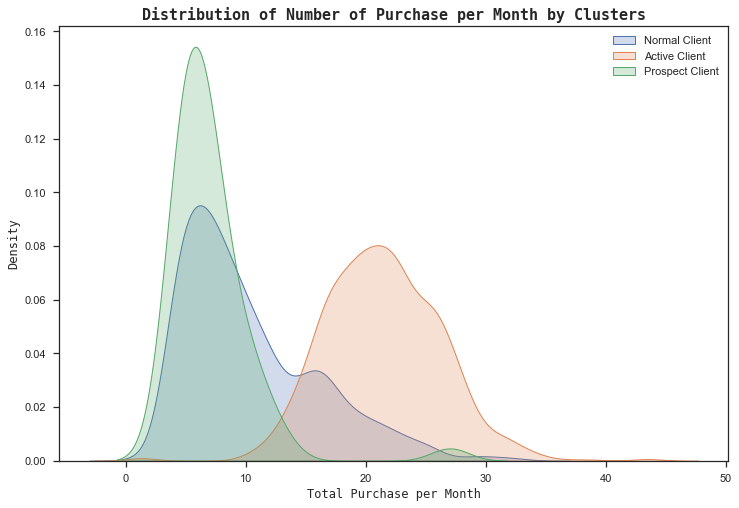

In [75]:
# Create the kde plot for total charges 
Normal_client = personality_df.loc[personality_df['Cluster'] == 'Normal Customer']
Active_client = personality_df.loc[personality_df['Cluster'] == 'Active Customer']
Prospect_client = personality_df.loc[personality_df['Cluster'] == 'Prospect Customer']

# Create denisity plot 
plt.figure(figsize=(12,8))
ax = sns.kdeplot(Normal_client['Total_Purchase_per_month'],
                shade = True,palette='Spectral')
ax = sns.kdeplot(Active_client['Total_Purchase_per_month'],
                ax =ax,palette='Spectral', shade= True)
ax = sns.kdeplot(Prospect_client['Total_Purchase_per_month'],
                ax =ax,palette='Spectral', shade= True)




ax.legend(["Normal Client","Active Client","Prospect Client"],loc='upper right') # Show legend 
ax.set_ylabel('Density',fontname = 'monospace')
ax.set_xlabel('Total Purchase per Month',fontname = 'monospace')
ax.set_title('Distribution of Number of Purchase per Month by Clusters',weight='bold', size = 15,fontname = 'monospace')
plt.show()

In the graph, we can see there are huge difference in number of purchase per month to differeciate three clusters. The distribution for normal and future prospect clients are very similar to each other. However, active clients have much higher purchase frequency. Again, as I mentioned before, our data shows there is huge difference between active and normal clients. A company needs to study their active customers to tailor their marketing strategy to better traget their active clients. 

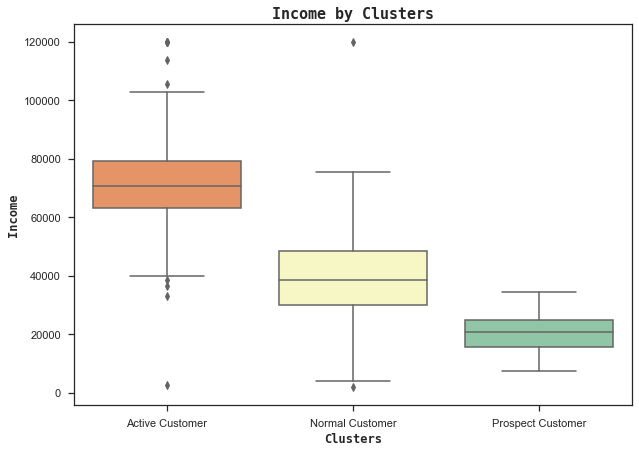

In [76]:
# Create Education plot 
plt.figure(figsize=(10,7)) # Reset the plot showing size 

ax = sns.boxplot(x="Cluster", y="Income",data=personality_df, dodge=True,palette="Spectral")
ax.set_ylabel('Income',fontname = 'monospace',weight = 'bold')
ax.set_xlabel('Clusters',fontname = 'monospace',weight = 'bold')
plt.title('Income by Clusters', fontsize=15, weight = 'bold',fontname = 'monospace')
plt.show()

From the graph, active clients have much higher income level comparing to other two clusters. Income level is one of the most important factors to determine customer's behaviors. Therefore, I think it's very important to have specifc marketing strategy to target rich people because their income level will have potential to make them become more active clients. 

In [77]:
def age_buckets(x): 
    if x < 30:
        return '18-29' 
    elif x < 40: 
        return '30-39' 
    elif x < 50: 
        return '40-49' 
    elif x < 60: 
        return '50-59' 
    elif x < 70: 
        return '60-69' 
    elif x >=70: 
        return '70+' 
    else: 
        return 'other'
personality_df['Age_range'] = personality_df['Age'].apply(age_buckets)

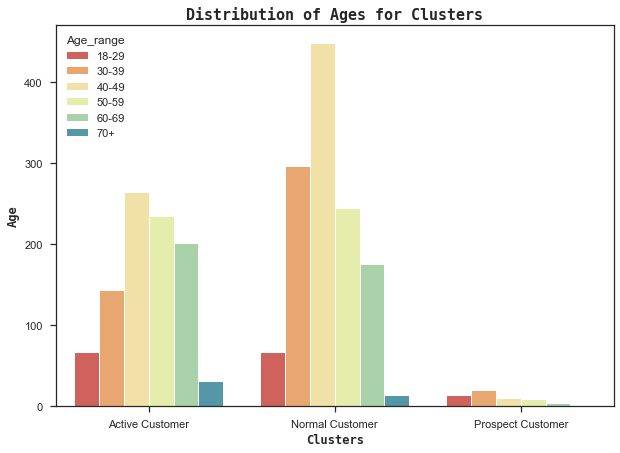

In [78]:
df5 = personality_df.groupby(['Cluster','Age_range'])['Age'].count().reset_index()
df5
plt.figure(figsize=(10,7))
fig = sns.barplot(x = "Cluster", y = "Age", hue = "Age_range", data = df5,palette='Spectral')
fig.set_title('Distribution of Ages for Clusters', size = 15,weight = 'bold',fontname = 'monospace')
fig.set_ylabel('Age',fontname = 'monospace',weight = 'bold')
fig.set_xlabel('Clusters',fontname = 'monospace',weight = 'bold')
plt.show()

This graph is showing the distribution of ages for different clusters. Again, I will put the details in my summary section. 

### Summary of Clusters: 
`Characteristics of Active Customer: `
1. **In terms of Education:**
Highly Active Customer are from UG background.

2. **In terms of Marital_status:**
Number of people in relationship are slightly less as compare to single people.

3. **In terms of Income:**
Income of Highly active customer are much higher as compare to other customers.

4. **In terms of Kids:**
Active customer have less number of childern as compare to mormal customerz (Max customers has no child).

5. **In terms of Expenses:**
Expenses of Active customer are more as compare to Normal.

6. **In terms of Age:**
The most popular customer age range age are between 35 to 60.





`Characteristics of Normal Customer: `
1. **In terms of Education:**
Highly Active Customer are from UG background.

2. **In terms of Marital_status:**
Number of people in relationship are nearly two times less than single people.

3. **In terms of Income:**
Income of normal customer are less as compare to active customer.

4. **In terms of Kids:**
Normal customer have more number of children as compare to other customers (Average of 1 child).

5. **In terms of Expenses:**
Expenses of Active customer are less as compare to Normal.

6. **In terms of Age:**
The most popular customer age range are between 40 to 50.


`Characteristics of Prospect Customer: `
1. **In terms of Education:**
Prospect Customer are from higher education background (PHD or Master).

2. **In terms of Marital_status:**
Number of people in relationship are equal to single people.

3. **In terms of Income:**
Income of prospect customer are very less.

4. **In terms of Kids:**
Only few of these customer have child.

5. **In terms of Expenses:**
Expenses of Prospect customer are very less.

6. **In terms of Age:**
The most popular customer age range are between 15 to 30.


### Logistic Regression  
1. Variable selection & Scaling 
2. Model Construction 
3. Result Analysis

Basic idea of logistic regression is estimate the prob of belonging to each class. In binary case we get an estimate of prob(y=1) or P(y=1), the prob of belonging to class 1 then set up a cut-off point to determine classes.

Reference:
- [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Backward Elemination](https://realpython.com/logistic-regression-python/)

In [79]:
df_churn_copy = df_churn.copy()
df_churn_copy[:5]

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService MultipleLines InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies        Contract  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  Churn
0       0              0        1           0       1             0            No             DSL               0             1                 0            0            0                0  Month-to-month                 1           Electronic check           29.85         29.85      0
1       1              0        0           0      34             1            No             DSL               1             0                 1            0            0                0        One year                 0               Mailed check           56.95       1889.50      0
2       1              0        0           0       2             1            No             DSL               1             1                 0            0            0                0  Month-to-month                 1               Mailed check           53.85        108.15      1
3       1              0        0           0      45             0            No             DSL               1             0                 1            1            0                0        One year                 0  Bank transfer (automatic)           42.30       1840.75      0
4       0              0        0           0       2             1            No     Fiber optic               0             0                 0            0            0                0  Month-to-month                 1           Electronic check           70.70        151.65      1

In [80]:
df_churn_copy['MultipleLines'].value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

In [81]:
df_churn_copy['MultipleLines'] =  df_churn_copy['MultipleLines'].apply(lambda x: 0 if x == 'No' else 1)
df_churn_copy['MultipleLines'].value_counts()

0    4072
1    2971
Name: MultipleLines, dtype: int64

In [82]:
#Make dummy variables
columns = ['InternetService','Contract','PaymentMethod']
df_churn_copy_trans = pd.get_dummies(df_churn_copy, columns = columns, drop_first=True)
df_churn_copy_trans.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  TotalCharges  Churn  InternetService_Fiber optic  InternetService_No  Contract_One year  Contract_Two year  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed check
0       0              0        1           0       1             0              0               0             1                 0            0            0                0                 1           29.85         29.85      0                            0                   0                  0                  0                                      0                               1                           0
1       1              0        0           0      34             1              0               1             0                 1            0            0                0                 0           56.95       1889.50      0                            0                   0                  1                  0                                      0                               0                           1
2       1              0        0           0       2             1              0               1             1                 0            0            0                0                 1           53.85        108.15      1                            0                   0                  0                  0                                      0                               0                           1
3       1              0        0           0      45             0              0               1             0                 1            1            0                0                 0           42.30       1840.75      0                            0                   0                  1                  0                                      0                               0                           0
4       0              0        0           0       2             1              0               0             0                 0            0            0                0                 1           70.70        151.65      1                            1                   0                  0                  0                                      0                               1                           0

In [83]:
# Using min-max method to scale data so the data result will be between 0 and 1 
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

df_churn_final = min_max_scaling(df_churn_copy_trans)
df_churn_final.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  TotalCharges  Churn  InternetService_Fiber optic  InternetService_No  Contract_One year  Contract_Two year  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed check
0     0.0            0.0      1.0         0.0  0.013889           0.0            0.0             0.0           1.0               0.0          0.0          0.0              0.0               1.0        0.115423      0.001275    0.0                          0.0                 0.0                0.0                0.0                                    0.0                             1.0                         0.0
1     1.0            0.0      0.0         0.0  0.472222           1.0            0.0             1.0           0.0               1.0          0.0          0.0              0.0               0.0        0.385075      0.215867    0.0                          0.0                 0.0                1.0                0.0                                    0.0                             0.0                         1.0
2     1.0            0.0      0.0         0.0  0.027778           1.0            0.0             1.0           1.0               0.0          0.0          0.0              0.0               1.0        0.354229      0.010310    1.0                          0.0                 0.0                0.0                0.0                                    0.0                             0.0                         1.0
3     1.0            0.0      0.0         0.0  0.625000           0.0            0.0             1.0           0.0               1.0          1.0          0.0              0.0               0.0        0.239303      0.210241    0.0                          0.0                 0.0                1.0                0.0                                    0.0                             0.0                         0.0
4     0.0            0.0      0.0         0.0  0.027778           1.0            0.0             0.0           0.0               0.0          0.0          0.0              0.0               1.0        0.521891      0.015330    1.0                          1.0                 0.0                0.0                0.0                                    0.0                             1.0                         0.0

**Balance Dataset**

I would like to check my dependent variable beacuse I want to avoid the unbalanced target variable. 

`Unbalanced Classes`:
In a dataset with highly unbalanced classes, the classifier always "predicts" the most common class without performing any analysis of the features, and it will cause a super high accuracy score and inaccurate confusion matrix. 
- [Details on Resampling](https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets)

Class 0: 5174
Class 1: 1869
Proportion: 2.77 : 1


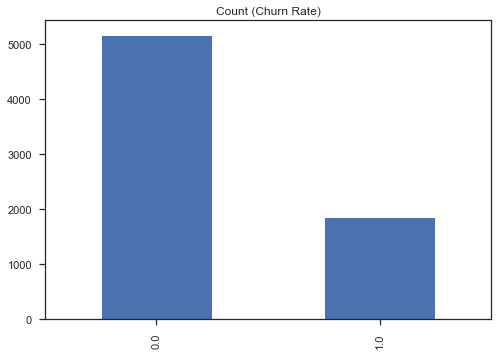

In [84]:
churn_count = df_churn_final['Churn'].value_counts()
print('Class 0:', churn_count[0])
print('Class 1:', churn_count[1])
print('Proportion:', round(churn_count[0] / churn_count[1], 2), ': 1')

churn_count.plot(kind='bar', title='Count (Churn Rate)');

**Resampling**

`Over-Sampling`: It consists of adding more examples from the minority class.Over-sampling is to duplicate random records from the minority class, which can cause **overfitting**. 

`Under-Sampling`: It consists of removing more examples from the majority class.Under-sampling removing random records from the majority class, which can cause **loss of information**.

In this case, I decided to use over-sampling because I am trying to build a super model to have the highest accuracy score instead I would like keep as much information in the model. 


In [85]:
# Separate classes 
count_class_0, count_class_1 = df_churn_final['Churn'].value_counts()
# Divide by class
df_target_0 = df_churn_final[df_churn_final['Churn'] == 0]
df_target_1 = df_churn_final[df_churn_final['Churn'] == 1]

Random Over-sampling:
1.0    5174
0.0    5174
Name: Churn, dtype: int64


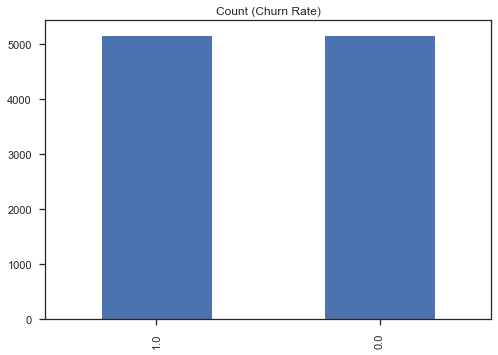

In [86]:
# Random Over-sampling 
df_class_1_over = df_target_1.sample(count_class_0, replace=True)
df_churn_final_over = pd.concat([df_target_0, df_class_1_over], axis=0)

print('Random Over-sampling:')
print(df_churn_final_over['Churn'].value_counts())

df_churn_final_over['Churn'].value_counts().plot(kind='bar', title='Count (Churn Rate)');
plt.show()
# Random Under-sampling 
# df_class_0_under = df_target_0.sample(count_class_1)
# df_test_under = pd.concat([df_class_0_under, df_target_1], axis=0)

From the graph, the data is now balanced for our target variable after we performed the random over-sampling.

**Logistic Regression**

In [87]:
y = df_churn_final_over['Churn'].values
X = df_churn_final_over.drop(columns = ['Churn'])

In [88]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [89]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [90]:
# Using model to predict 
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print(metrics.accuracy_score(y_test, prediction_test))

0.750402576489533


In [91]:
# Add constant to see model stats 
from statsmodels.tools import add_constant as add_constant
df_churn_final_constant = add_constant(df_churn_final_over)
df_churn_final_constant.head()

const  gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  TotalCharges  Churn  InternetService_Fiber optic  InternetService_No  Contract_One year  Contract_Two year  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed check
0    1.0     0.0            0.0      1.0         0.0  0.013889           0.0            0.0             0.0           1.0               0.0          0.0          0.0              0.0               1.0        0.115423      0.001275    0.0                          0.0                 0.0                0.0                0.0                                    0.0                             1.0                         0.0
1    1.0     1.0            0.0      0.0         0.0  0.472222           1.0            0.0             1.0           0.0               1.0          0.0          0.0              0.0               0.0        0.385075      0.215867    0.0                          0.0                 0.0                1.0                0.0                                    0.0                             0.0                         1.0
3    1.0     1.0            0.0      0.0         0.0  0.625000           0.0            0.0             1.0           0.0               1.0          1.0          0.0              0.0               0.0        0.239303      0.210241    0.0                          0.0                 0.0                1.0                0.0                                    0.0                             0.0                         0.0
6    1.0     1.0            0.0      0.0         1.0  0.305556           1.0            1.0             0.0           1.0               0.0          0.0          1.0              0.0               1.0        0.704975      0.222779    0.0                          1.0                 0.0                0.0                0.0                                    1.0                             0.0                         0.0
7    1.0     0.0            0.0      0.0         0.0  0.138889           0.0            0.0             1.0           0.0               0.0          0.0          0.0              0.0               0.0        0.114428      0.032668    0.0                          0.0                 0.0                0.0                0.0                                    0.0                             0.0                         1.0

In [92]:
# Change the order of columns 
col_order = ["const","gender", "SeniorCitizen","Partner","Dependents",'InternetService_Fiber optic','InternetService_No',
             'Contract_One year','Contract_Two year','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check',
             'PaymentMethod_Mailed check','tenure','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
             'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','MonthlyCharges','TotalCharges','Churn']
df_churn_final_constant = df_churn_final_constant.reindex(columns=col_order)
df_churn_final_constant.head()

const  gender  SeniorCitizen  Partner  Dependents  InternetService_Fiber optic  InternetService_No  Contract_One year  Contract_Two year  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed check    tenure  PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  TotalCharges  Churn
0    1.0     0.0            0.0      1.0         0.0                          0.0                 0.0                0.0                0.0                                    0.0                             1.0                         0.0  0.013889           0.0            0.0             0.0           1.0               0.0          0.0          0.0              0.0               1.0        0.115423      0.001275    0.0
1    1.0     1.0            0.0      0.0         0.0                          0.0                 0.0                1.0                0.0                                    0.0                             0.0                         1.0  0.472222           1.0            0.0             1.0           0.0               1.0          0.0          0.0              0.0               0.0        0.385075      0.215867    0.0
3    1.0     1.0            0.0      0.0         0.0                          0.0                 0.0                1.0                0.0                                    0.0                             0.0                         0.0  0.625000           0.0            0.0             1.0           0.0               1.0          1.0          0.0              0.0               0.0        0.239303      0.210241    0.0
6    1.0     1.0            0.0      0.0         1.0                          1.0                 0.0                0.0                0.0                                    1.0                             0.0                         0.0  0.305556           1.0            1.0             0.0           1.0               0.0          0.0          1.0              0.0               1.0        0.704975      0.222779    0.0
7    1.0     0.0            0.0      0.0         0.0                          0.0                 0.0                0.0                0.0                                    0.0                             0.0                         1.0  0.138889           0.0            0.0             1.0           0.0               0.0          0.0          0.0              0.0               0.0        0.114428      0.032668    0.0

In [93]:
# Plot the stats table 
import scipy.stats as st
import statsmodels.api as sm
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=df_churn_final_constant.columns[:-1]
model=sm.Logit(df_churn_final_constant.Churn,df_churn_final_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.484507
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10348
Model:                          Logit   Df Residuals:                    10324
Method:                           MLE   Df Model:                           23
Date:                Thu, 16 Dec 2021   Pseudo R-squ.:                  0.3010
Time:                        12:36:47   Log-Likelihood:                -5013.7
converged:                       True   LL-Null:                       -7172.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.4199      0.214      6.636      0.000       1.001       1.839
gender                                   -0.0283      0.049     -0.572      0.567      -0.125       0.069
SeniorCitizen                             0.2795      0.067      4.183      0.000       0.149       0.410
Partner                                   0.0172      0.060      0.288      0.773      -0.100       0.134
Dependents                               -0.1513      0.066     -2.281      0.023      -0.281      -0.021
InternetService_Fiber optic               2.4932      0.610      4.089      0.000       1.298       3.688
InternetService_No                       -2.5746      0.617     -4.175      0.000      -3.783      -1.366
Contract_One year                        -0.6638      0.076     -8.702      0.000      -0.813      -0.514
Contract_Two year                        -1.4621      0.118    -12.432      0.000      -1.693      -1.232
PaymentMethod_Credit card (automatic)    -0.0163      0.083     -0.197      0.844      -0.178       0.146
PaymentMethod_Electronic check            0.3666      0.071      5.160      0.000       0.227       0.506
PaymentMethod_Mailed check               -0.0819      0.085     -0.964      0.335      -0.248       0.085
tenure                                   -3.6054      0.290    -12.453      0.000      -4.173      -3.038
PhoneService                              0.9881      0.495      1.996      0.046       0.018       1.958
MultipleLines                             0.4992      0.136      3.676      0.000       0.233       0.765
OnlineSecurity                           -0.0728      0.136     -0.535      0.593      -0.340       0.194
OnlineBackup                              0.2358      0.134      1.755      0.079      -0.028       0.499
DeviceProtection                          0.2347      0.134      1.748      0.080      -0.028       0.498
TechSupport                               0.0550      0.137      0.402      0.688      -0.213       0.323
StreamingTV                               0.9275      0.250      3.716      0.000       0.438       1.417
StreamingMovies                           0.9340      0.250      3.739      0.000       0.444       1.424
PaperlessBilling                          0.2857      0.056      5.128      0.000       0.176       0.395
MonthlyCharges                           -7.1518      2.440     -2.931      0.003     -11.934      -2.370
TotalCharges                              2.0870      0.407      5.126      0.000       1.289       2.885
=========================================================================================================
"""

The table shows some of the variables with P value higher than the preferred alpha(5%) and thereby showing low statistically significant relationship with the probability of churn rate. I would like to remove those variables to help my explaination.

I will use the `Backward Elemination` approach to remove those attributes with highest P-value one at a time follwed by running the regression repeatedly until all variables have P Values less than 0.05.



In [94]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the y-variable and a list of column names(except y), runs the regression repeatedly eleminating feature with the highest
    P-value above 0.05 one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(df_churn_final_constant,df_churn_final_constant.Churn,cols)

In [95]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10348
Model:                          Logit   Df Residuals:                    10330
Method:                           MLE   Df Model:                           17
Date:                Thu, 16 Dec 2021   Pseudo R-squ.:                  0.3008
Time:                        12:36:47   Log-Likelihood:                -5015.3
converged:                       True   LL-Null:                       -7172.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              1.3588      0.137      9.887      0.000       1.089       1.628
SeniorCitizen                      0.2782      0.066      4.201      0.000       0.148       0.408
Dependents                        -0.1445      0.060     -2.426      0.015      -0.261      -0.028
InternetService_Fiber optic        2.5403      0.203     12.522      0.000       2.143       2.938
InternetService_No                -2.6198      0.252    -10.416      0.000      -3.113      -2.127
Contract_One year                 -0.6607      0.076     -8.676      0.000      -0.810      -0.511
Contract_Two year                 -1.4542      0.117    -12.409      0.000      -1.684      -1.225
PaymentMethod_Electronic check     0.3986      0.053      7.500      0.000       0.294       0.503
tenure                            -3.5516      0.282    -12.573      0.000      -4.105      -2.998
PhoneService                       1.0196      0.196      5.207      0.000       0.636       1.403
MultipleLines                      0.5084      0.072      7.085      0.000       0.368       0.649
OnlineBackup                       0.2442      0.073      3.365      0.001       0.102       0.386
DeviceProtection                   0.2480      0.073      3.379      0.001       0.104       0.392
StreamingTV                        0.9504      0.104      9.168      0.000       0.747       1.154
StreamingMovies                    0.9557      0.104      9.224      0.000       0.753       1.159
PaperlessBilling                   0.2904      0.056      5.224      0.000       0.181       0.399
MonthlyCharges                    -7.2961      0.829     -8.806      0.000      -8.920      -5.672
TotalCharges                       2.0344      0.404      5.040      0.000       1.243       2.826
==================================================================================================
"""

In [96]:
# Showing more stats information 
# params = np.exp(result.params)
# conf = np.exp(result.conf_int())
# conf['OR'] = params
# pvalue=round(result.pvalues,3)
# conf['pvalue']=pvalue
# conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
# print ((conf))

After the backward elimination, we can see we only have those varables are stats siginificant(P-value less than 5%). 

We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation. Negative relation means that likeliness of churn decreases with that variable and vice-versa for positive relation.

`Varible interpretation Example(Contract term) for logistic regression:` 

+ This fitted model shows that, holding all other features constant, the odds of getting churned for having the contract term of one-month (Contract_one_month = 1)over that of Contract_One year and Contract_Two year (Contract_One year = 0 & Contract_Two year = 0) is much higher.


`Takeways from model:`
+ In summary, a customer has longer tenure(Number of months the customer has stayed with the company), has Online Security program and TechSupport service who has lower Monthly payment charges for loans and the longer contract term for its employement using automative payment methods like (Bank transfer (automatic), Credit card (automatic) ) have positive effect on churn which means those factors are able to decrease the prob of the churn rate.

+ In the opposite, a customer who has higher total payment charges for loans and, who is using paperless billing and has mutiple lines(a customer who has mutiple phone service lines), using traditional payment methods(Electronic check, Mailed check) for payment, and who is a senior citizen have negative effect on churn which means those factors will increase the prob of the churn rate.

+ One particular interesting factor is fibre optic internet services can lead to higher churn rate. This is interesting because although fibre optic services are faster, customers are likely to churn because of it.

### Random Forest 
1. Variable selection & Scaling 
2. Model Construction 
3. Result Analysis

The basic idea behind the Random forest is to use bootstrapping method to get a lot of training datasets and construct a signle decision tree from every single subsets and we let the them vote, then we take the majority votes from all decision trees to determine its classification. 


Reference:
- [Random Forest](https://careerfoundry.com/en/blog/data-analytics/what-is-random-forest/)

In [97]:
y = df_churn_final_over['Churn'].values
X = df_churn_final_over.drop(columns = ['Churn'])

In [98]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_result= model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_result))

0.77487922705314


<AxesSubplot:>

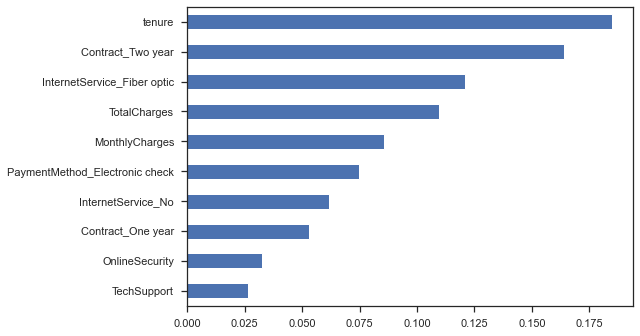

In [99]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

After I ran the random forest, I can see that the random forest model give me higher prediction accuracy (78%) comparing to logistic regression (76%). One of the most important reasons why I choosed to use random forest because the model is able to tell us what are some most important features in our model. From the graph, those are all important features and will impact on whether a customer will churn or not. The top 3 features (variables) are tenure, contract term and total charges, which means a customer's contract term for its loan payment, the total charges for the goods or product, and Number of months the customer has stayed with the company are the most important factors to influnce its churn rate. In general, a company want to have a longer contract term for their employees, lower the total amount payment charges for their loans and extend the contract term to be longer will have positive impact on the customer churn rate. 

# Conclusion & Summary 

### Target Business Goal for this Project 
*A company has two methods to get more customers:*
1. Attract more customers 
2. Keep the existing customers. 

I would like to keep my conculsion in high-level, not only for this particular datam but also my finding in the industry and general patterns. 

#### Attract more customers:
In order to achieve the first business goals, a company has to better target their customers and understand the difference between different customers. Since we have limited resource and money, I built a k-mean clustering analysis to grouping customers based on their characteristics. In high level, we can divide customers into three groups which are active, normal and future prospect clients. I want to make my recommdation more general and not only specific for this dataset. In high level, there are four conclusions to attract more customers:

1. Customers are able to divide into three to four groups. Active, normal, future customers. A company needs to separate them and develop different marketing strategy to target them differently based on their personalities and historical purchase behaviors to find patterns.

2. Marketing campaigns are important. Of course, there are more analysis inside the marketing campaigns. A company needs to use their specific collected data from their product and customers to better target their customers and measure their marketing campaign performance. 

3. Customer Service is important. From our data, we can see there are more complains coming from normal clients than active clients. My conclusion is if a company is able provide excellent customer service, they are more likely to satisfy their customers in high level and turn normal customers to active customers and attract more future customers as well. 

4. In general, a active customer who is likely to have high income level, a good education background, and who is willing to take promotions from marketing campaigns, they are not likely to have a big family(usually one or no kid). 


#### Keep the existing customers:
In order to keep the existing customers, a company needs to reduce its churn rate as much as possible. There are so many internal and external factors to cause a custer churn. My hypotheis is to built a logistic regression and a random forest machine learning model to predict behavior to retain customers and identify factors to potentially reduce their churn rate. Based on the model result, there are some conclusions below: 

1. The top 3 features (variables) to cause customer churn are tenure, contract term and total charges, which means a customer's contract term for its loan payment, the total charges for the goods or product, and Number of months the customer has stayed with their company(employment length).

2. In general, a business firm want to have a longer contract term for their employees, encourage employees to have lower total amount payment charges for  loans and longer the contract-term for their payment will have positive impact on the employee churn rate. 

3. In summary, a customer who has longer tenure(Number of months the customer has stayed with the company), has Online Security program and Tech-Support service and who has lower Monthly payment charges for loans and the longer contract term for its employment, using auto-mative payment methods like (Bank transfer (automatic), Credit card (automatic) ) have positive effect on churn which means those factors are able to decrease the prob of the churn rate.

4. In the opposite, a customer who has higher total payment charges for loans and, who is using paperless billing and has multiple lines(a customer who has multiple phone service lines), using traditional payment methods(Electronic check, Mailed check) for payment, and who is a senior citizen have negative effect on churn which means those factors will increase the prob of the churn rate.


#### Future study and research:
Customer personaliy analysis is a very hard and board topic in nowadays. My project is mainly focus on providing high-level suggestions and findings because I firmly believe each company will have different customer segements and their market position in the industry, even differnt industries are so different! A good customer personality analysis for a spcific company needs to analysis on their customer groups, product performance and reviews, future customer acquisition, marketing performance analysis, etc. In summary, this is a very board and complicated topic, but I think this is the "Real Money" because we are able to combining modern technology and data together to drive our firms forward and better target customers. 

I find some interesting resources in this field and feel free to check it out! 
- [7 Steps to Customer Understanding](https://www.userlike.com/en/blog/customer-analysis)
- [The relationship between brand personality and customer personality](https://link.springer.com/content/pdf/10.1057%2Fjt.2012.12.pdf)